In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import random as r
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
import statistics
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

from warnings import filterwarnings
filterwarnings('ignore')
# Import label encoder
from sklearn import preprocessing

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor


# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import power_transform

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
# import function to perform feature selection
from sklearn.feature_selection import RFE

# import the XGBoost function for classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import VotingClassifier

In [ ]:
UniqueID - Identifier for customers
loan_default -Payment default in the first EMI on due date
disbursed_amount- Amount of Loan disbursed
asset_cost- Cost of the Asset
ltv- Loan to Value of the asset
branch_id- Branch where the loan was disbursed
supplier_id- Vehicle Dealer where the loan was disbursed
manufacturer_id- Vehicle manufacturer(Hero, Honda, TVS etc.)
Current_pincode- Current pincode of the customer
Date.of.Birth- Date of birth of the customer
Employment.Type - Employment Type of the customer (Salaried/Self Employed)
DisbursalDate - Date of disbursement
State_ID - state of disbursement
Employee_code_ID - Employee of the organization who logged the disbursement
MobileNo_Avl_Flag - if Mobile no. was shared by the customer then flagged as 1
Aadhar_flag - if aadhar was shared by the customer then flagged as 1
PAN_flag - if pan was shared by the customer then flagged as 1
VoterID_flag  - if voter was shared by the customer then flagged as 1
Driving_flag - if DL was shared by the customer then flagged as 1
Passport_flag - if passport was shared by the customer then flagged as 1
PERFORM_CNS.SCORE - Bureau Score
PERFORM_CNS.SCORE.DESCRIPTION - credit score description
PRI.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement
Primary accounts are those which the customer has taken for his personal use
PRI.ACTIVE.ACCTS - count of active loans taken by the customer at the time of disbursement
PRI.OVERDUE.ACCTS - count of default accounts at the time of disbursement
PRI.CURRENT.BALANCE - total Principal outstanding amount of the active loans at the time of disbursement
PRI.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement
PRI.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement
SEC.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement
Secondary accounts are those which the customer act as a co-applicant or gaurantor
SEC.ACTIVE.ACCTS - count of active loans taken by the customer at the time of disbursement
SEC.OVERDUE.ACCTS - count of default accounts at the time of disbursement
SEC.CURRENT.BALANCE -  total Principal outstanding amount of the active loans at the time of disbursement
SEC.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement
SEC.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement
PRIMARY.INSTAL.AMT - EMI Amount of the primary loan
SEC.INSTAL.AMT - EMI Amount of the secondary loan
NEW.ACCTS.IN.LAST.SIX.MONTHS - New loans taken by the customer in last 6 months before the disbursment
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS - Loans defaulted in the last 6 months
AVERAGE.ACCT.AGE - Average loan tenure
CREDIT.HISTORY.LENGTH - Time since first loan
NO.OF_INQUIRIES - Enquries done by the customer for loans

In [2]:
# read the data
df = pd.read_csv('train.csv')

df.head(2)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1


In [3]:
df1 = df.copy() #- Copying the original dataset

In [4]:
im = df1['loan_default'].value_counts()/len(df1)

# NULL VALUE VALIDATION:

In [5]:
df.shape

(233154, 41)

In [6]:
df1.isnull().sum()/len(df1)*100

UniqueID                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
Current_pincode_ID                     0.000000
Date.of.Birth                          0.000000
Employment.Type                        3.285811
DisbursalDate                          0.000000
State_ID                               0.000000
Employee_code_ID                       0.000000
MobileNo_Avl_Flag                      0.000000
Aadhar_flag                            0.000000
PAN_flag                               0.000000
VoterID_flag                           0.000000
Driving_flag                           0.000000
Passport_flag                          0.000000
PERFORM_CNS.SCORE                      0.000000
PERFORM_CNS.SCORE.DESCRIPTION          0

<b>Observation</b>

The above result shows that there is only one variable with null values in the data.

The Column "Employment type" has 3.28 % null data compared to the length of the whole dataset.

In this case, we can drop those values to get a complete dataset.

In [7]:
p=df1[df1['Employment.Type'].isnull()] # - Finding the rows of null values

df1.drop(index = p.index,inplace = True)


In [8]:
df1=df1.reset_index(drop=True)

In [9]:
p  = df1.isnull().sum()/len(df) *100
p[(p>0)]

Series([], dtype: float64)

<b>Inference:</b>

From the above observation, we can confirm that no variable has null values after the NULL value treatment

In [10]:
df1.shape

(225493, 41)

# Data Cleaning:

<b>Data types check:

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             225493 non-null  int64  
 1   disbursed_amount                     225493 non-null  int64  
 2   asset_cost                           225493 non-null  int64  
 3   ltv                                  225493 non-null  float64
 4   branch_id                            225493 non-null  int64  
 5   supplier_id                          225493 non-null  int64  
 6   manufacturer_id                      225493 non-null  int64  
 7   Current_pincode_ID                   225493 non-null  int64  
 8   Date.of.Birth                        225493 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        225493 non-null  object 
 11  State_ID     

<b>Observation</b>

From the above result, we can see that the variables "Date.of.Birth" and "DisbursalDate" are not in Date time format due to prescence of special characters and different date format in the data.

Also variable "AVERAGE.ACCT.AGE" and "CREDIT.HISTORY.LENGTH" should be in numbers since it is the length of months


In [12]:
#"Date.of.birth" and "Disbursaldate":

import datetime as dt

df2 = df1.copy()

lst = []
for i in df2['Date.of.Birth']:
    j = str(i)
    if j[-2:] == '00':
        j = j[0:6] + "2000"
    else:
        j = j[0:6] + "19" + j[-2:]
        
    lst.append(dt.datetime.strptime(j, '%d-%m-%Y'))
        
df2['Date.of.Birth'] = pd.Series(lst)

lst = []
for i,j in df2['DisbursalDate'].iteritems():
    if j[2]=='-':
        lst.append(dt.datetime.strptime(j, '%d-%m-%y'))
    else:
        lst.append(j)
        
df2['DisbursalDate'] = pd.Series(lst)



In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             225493 non-null  int64         
 1   disbursed_amount                     225493 non-null  int64         
 2   asset_cost                           225493 non-null  int64         
 3   ltv                                  225493 non-null  float64       
 4   branch_id                            225493 non-null  int64         
 5   supplier_id                          225493 non-null  int64         
 6   manufacturer_id                      225493 non-null  int64         
 7   Current_pincode_ID                   225493 non-null  int64         
 8   Date.of.Birth                        225493 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

<b> Both the columns "Date.of.birth" and "Disbursaldate" has been udpated to date time data type

In [14]:
# "AVERAGE.ACCT.AGE" and "CREDIT.HISTORY.LENGTH" :

# the data is in the format "1yrs 11mon" , from this we have to pull out no.of year and no.of months
# and add them both to get the total month duration.

lst = []
for i,j in df2['AVERAGE.ACCT.AGE'].iteritems():
    
    n_y = j.index('y')
    a = j[0:n_y]
    
    n_ = j.index(' ')
    n_m = j.index('m')
    b = j[n_+1 : n_m]
    
    c = int(a)*12 + int(b)
    lst.append(c)
        
df2['AVERAGE.ACCT.AGE'] = pd.Series(lst)

lst = []
for i,j in df2['CREDIT.HISTORY.LENGTH'].iteritems():
    
    n_y = j.index('y')
    a = j[0:n_y]
    
    n_ = j.index(' ')
    n_m = j.index('m')
    b = j[n_+1 : n_m]
    
    c = int(a)*12 + int(b)
    lst.append(c)
        
df2['CREDIT.HISTORY.LENGTH'] = pd.Series(lst)

In [15]:
pd.concat([df1[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']],df2[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']]],axis = 1)

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0yrs 0mon,0yrs 0mon,0,0
1,1yrs 11mon,1yrs 11mon,23,23
2,0yrs 0mon,0yrs 0mon,0,0
3,0yrs 8mon,1yrs 3mon,8,15
4,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...
225488,1yrs 9mon,3yrs 3mon,21,39
225489,0yrs 6mon,0yrs 6mon,6,6
225490,0yrs 0mon,0yrs 0mon,0,0
225491,0yrs 0mon,0yrs 0mon,0,0


<b>Both the columns "AVERAGE.ACCT.AGE" and "CREDIT.HISTORY.LENGTH" is converted to integer data types with respective values.

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             225493 non-null  int64         
 1   disbursed_amount                     225493 non-null  int64         
 2   asset_cost                           225493 non-null  int64         
 3   ltv                                  225493 non-null  float64       
 4   branch_id                            225493 non-null  int64         
 5   supplier_id                          225493 non-null  int64         
 6   manufacturer_id                      225493 non-null  int64         
 7   Current_pincode_ID                   225493 non-null  int64         
 8   Date.of.Birth                        225493 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

<b>Inference :</b>
    
    All the data types have been cleaned and converted according to the values.

# ENCODING:

In [17]:
n = df2.select_dtypes(exclude=np.number)
n.columns

Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION'],
      dtype='object')

We can see from above is that there are two catagorical column which are "Employment.Type" and "PERFORM_CNS.SCORE.DESCRIPTION"

In [18]:
df3 = df2.copy()

In [19]:
# 'Employment.Type' - One Hot Encoding:

df3['Employment.Type'] = pd.get_dummies(df3['Employment.Type'],drop_first = True) # Salaried - 0 ; Self-employed - 1
Employment_Type_Description = pd.DataFrame(np.array(['Salaried','Self-employed']),columns = ['Employment_Type'])

In [20]:
Employment_Type_Description

,Employment_Type
0,Salaried
1,Self-employed


In [21]:
pd.concat([df1[['Employment.Type']],df3[['Employment.Type']]],axis = 1)

,Employment.Type,Employment.Type
0,Salaried,0
1,Self employed,1
2,Self employed,1
3,Self employed,1
4,Self employed,1
...,...,...
225488,Salaried,0
225489,Self employed,1
225490,Salaried,0
225491,Salaried,0


<b>Inference :</b>
    
    From above table, we can see that the categorical column are encoded and shown
    
    Data frame has been created which gives the Description of encoding for column:
        * 'Employment.Type' - Employment_Type_Description

# FEATURE ENGINEERING:

# <B>Add Column 'Loan_disbursed_Age':

Adding a column Age which gives the age of the customer when he recieved the disbursed amount

In [22]:
d = (df3['DisbursalDate'] - df3['Date.of.Birth'])

In [23]:
d = (np.array([i.days for i in d]))/365
d = d.round(1)

In [24]:
df3['Loan_disbursed_Age'] = d

<B>Drop Column ''DisbursalDate'' and "Date.of.Birth":

Since we have calculated the Loan_Disbursed_Age, we can drop the two above mentioned columns which is not required anymore

In [25]:
df3.drop(columns = ['DisbursalDate', 'Date.of.Birth'],inplace = True)

In [26]:
df3.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age
0,420825,50578,58400,89.55,67,22807,45,1441,0,6,...,0,0,0,0,0,0,0,0,0,34.6
1,537409,47145,65550,73.23,67,22807,45,1502,1,6,...,0,1991,0,0,1,23,23,0,1,33.2
2,417566,53278,61360,89.63,67,22807,45,1497,1,6,...,0,0,0,0,0,0,0,0,0,33.0
3,624493,57513,66113,88.48,67,22807,45,1501,1,6,...,0,31,0,0,0,8,15,1,1,24.8
4,539055,52378,60300,88.39,67,22807,45,1495,1,6,...,0,0,0,0,0,0,0,1,1,40.8


# Drop Column ''MobileNo_Avl_Flag", "Unique ID":

In [27]:
len(df3['UniqueID'].unique())/len(df3)

1.0

In [28]:
df3['MobileNo_Avl_Flag'].unique()

array([1], dtype=int64)

<b>Inference:</b>

    1. We can see that all the values in the column Unique ID are unique values, they won't give any impact on the model building
    
    2. We can see that there is only one unique value in the whole column which won't make any impact on the model building.
    
    3. Also the feature "ltv" is calculated by dividing feature "asset_cost" by "disbursed_amount". Since we already have "ltv", feature "asset_cost" is an extra in the dataset
    
    Hence we can drop features "MobileNo_Avl_Flag", "Unique ID" and "asset_cost"

In [29]:
df3.drop(columns = ['UniqueID', 'MobileNo_Avl_Flag'],inplace = True)

In [30]:
df3.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age
0,50578,58400,89.55,67,22807,45,1441,0,6,1998,...,0,0,0,0,0,0,0,0,0,34.6
1,47145,65550,73.23,67,22807,45,1502,1,6,1998,...,0,1991,0,0,1,23,23,0,1,33.2
2,53278,61360,89.63,67,22807,45,1497,1,6,1998,...,0,0,0,0,0,0,0,0,0,33.0
3,57513,66113,88.48,67,22807,45,1501,1,6,1998,...,0,31,0,0,0,8,15,1,1,24.8
4,52378,60300,88.39,67,22807,45,1495,1,6,1998,...,0,0,0,0,0,0,0,1,1,40.8


In [31]:
df3.shape

(225493, 38)

# FEATURE "FLAG":

<b>On features "Aadhar_flag", "PAN_flag", "VoterID_flag", "Driving_flag" and "Passport_flag" with loan_default :

In [32]:
tab = pd.crosstab(df3['Aadhar_flag'],df3['loan_default'])

obs_val = tab.values

tstat,p,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)

print("Test statistic:", tstat)
print("p-value:", p)


Test statistic: 425.81154218906823
p-value: 1.325915333825713e-94


In [33]:
tab = pd.crosstab(df3['Passport_flag'],df3['loan_default'])

obs_val = tab.values

tstat,p,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)

print("Test statistic:", tstat)
print("p-value:", p)

Test statistic: 13.864139151751408
p-value: 0.00019651259873838548


In [34]:
tab = pd.crosstab(df3['PAN_flag'],df3['loan_default'])

obs_val = tab.values

tstat,p,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)

print("Test statistic:", tstat)
print("p-value:", p)

Test statistic: 0.9743416737357117
p-value: 0.32359975975129335


In [35]:
tab = pd.crosstab(df3['Driving_flag'],df3['loan_default'])

obs_val = tab.values

tstat,p,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)

print("Test statistic:", tstat)
print("p-value:", p)

Test statistic: 7.009480037723346
p-value: 0.00810792243172315


<b>Inference:</b>

   We can see that p-value for chi-square test performed between features "PAN_flag" and "loan_default" is greater than 
    alpha (0.05) ,
    which implies that both the columns are independent.
    

<b>Finding Weightage of every columns:

In [36]:
d1 = df3['Aadhar_flag']/df3['Aadhar_flag'].sum() 
d2 = df3['Passport_flag']/df3['Passport_flag'].sum()
d3 = df3['PAN_flag']/df3['PAN_flag'].sum()
d4 = df3['Driving_flag']/df3['Driving_flag'].sum()
d5 = df3['VoterID_flag']/df3['VoterID_flag'].sum()


In [37]:
df3['Flag']=d1+d2+d3+d4+d5

In [38]:
df3[['Aadhar_flag','Passport_flag','PAN_flag','Driving_flag','VoterID_flag','Flag']].tail(10)

,Aadhar_flag,Passport_flag,PAN_flag,Driving_flag,VoterID_flag,Flag
225483,1,0,0,0,0,0.000005
225484,1,0,0,0,0,0.000005
225485,1,0,0,0,0,0.000005
225486,1,0,0,0,0,0.000005
225487,1,0,0,0,0,0.000005
225488,0,0,0,0,1,0.000030
225489,0,0,0,0,1,0.000030
225490,1,0,0,0,0,0.000005
225491,1,0,0,0,0,0.000005
225492,1,0,0,0,0,0.000005


<b>Inference:</b>

The Above Feature "Flag" is created by considering the weightage of all the Flag features like:

Aadhar_flag, Passport_flag, PAN_flag, Driving_flag, VoterID_flag

# FEATURE "Branch_size":

In [39]:
pivot_count = df3.pivot_table(values="branch_id", columns="State_ID", aggfunc=pd.Series.nunique)

equiv = {i:max(pivot_count[i]) for i in pivot_count.columns}

df3["Branch_size"] = df3["State_ID"].map(equiv)
df3.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age,Flag,Branch_size
0,50578,58400,89.55,67,22807,45,1441,0,6,1998,...,0,0,0,0,0,0,0,34.6,0.000005,10
1,47145,65550,73.23,67,22807,45,1502,1,6,1998,...,0,0,1,23,23,0,1,33.2,0.000005,10
2,53278,61360,89.63,67,22807,45,1497,1,6,1998,...,0,0,0,0,0,0,0,33.0,0.000005,10
3,57513,66113,88.48,67,22807,45,1501,1,6,1998,...,0,0,0,8,15,1,1,24.8,0.000005,10
4,52378,60300,88.39,67,22807,45,1495,1,6,1998,...,0,0,0,0,0,1,1,40.8,0.000005,10


<b>Inference:</b>

1. Feature "Branch_size" contains No. of Branches avalilable in a State

# FEATURE "Supplier_size":

In [40]:
pivot_count = df3.pivot_table(values="supplier_id", columns="manufacturer_id", aggfunc=pd.Series.nunique)

equiv = {i:max(pivot_count[i]) for i in pivot_count.columns}

df3["Supplier_size"] = df3["manufacturer_id"].map(equiv)
df3.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age,Flag,Branch_size,Supplier_size
0,50578,58400,89.55,67,22807,45,1441,0,6,1998,...,0,0,0,0,0,0,34.6,0.000005,10,750
1,47145,65550,73.23,67,22807,45,1502,1,6,1998,...,0,1,23,23,0,1,33.2,0.000005,10,750
2,53278,61360,89.63,67,22807,45,1497,1,6,1998,...,0,0,0,0,0,0,33.0,0.000005,10,750
3,57513,66113,88.48,67,22807,45,1501,1,6,1998,...,0,0,8,15,1,1,24.8,0.000005,10,750
4,52378,60300,88.39,67,22807,45,1495,1,6,1998,...,0,0,0,0,1,1,40.8,0.000005,10,750


<b>Inference:</b>

1. Feature "Supplier_size" contains No. of Suppliers avalilable for Manufacturer

# FEATURE "Employee_size":

In [41]:
pivot_count = df3.pivot_table(values="Employee_code_ID", columns="manufacturer_id", aggfunc=pd.Series.nunique)

equiv = {i:max(pivot_count[i]) for i in pivot_count.columns}

df3["Employee_size"] = df3["manufacturer_id"].map(equiv)
df3.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age,Flag,Branch_size,Supplier_size,Employee_size
0,50578,58400,89.55,67,22807,45,1441,0,6,1998,...,0,0,0,0,0,34.6,0.000005,10,750,2217
1,47145,65550,73.23,67,22807,45,1502,1,6,1998,...,1,23,23,0,1,33.2,0.000005,10,750,2217
2,53278,61360,89.63,67,22807,45,1497,1,6,1998,...,0,0,0,0,0,33.0,0.000005,10,750,2217
3,57513,66113,88.48,67,22807,45,1501,1,6,1998,...,0,8,15,1,1,24.8,0.000005,10,750,2217
4,52378,60300,88.39,67,22807,45,1495,1,6,1998,...,0,0,0,1,1,40.8,0.000005,10,750,2217


<b>Inference:</b>

1. Feature "Employee_size" contains No. of Employee code ID avalilable for Manufacturer ID

# FEATURE "Pin_code_size":

In [42]:
pivot_count = df3.pivot_table(values="Current_pincode_ID", columns="Employee_code_ID", aggfunc=pd.Series.nunique)

equiv = {i:max(pivot_count[i]) for i in pivot_count.columns}

df3["Pin_code_size"] = df3["Employee_code_ID"].map(equiv)
df3.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age,Flag,Branch_size,Supplier_size,Employee_size,Pin_code_size
0,50578,58400,89.55,67,22807,45,1441,0,6,1998,...,0,0,0,0,34.6,0.000005,10,750,2217,19
1,47145,65550,73.23,67,22807,45,1502,1,6,1998,...,23,23,0,1,33.2,0.000005,10,750,2217,19
2,53278,61360,89.63,67,22807,45,1497,1,6,1998,...,0,0,0,0,33.0,0.000005,10,750,2217,19
3,57513,66113,88.48,67,22807,45,1501,1,6,1998,...,8,15,1,1,24.8,0.000005,10,750,2217,19
4,52378,60300,88.39,67,22807,45,1495,1,6,1998,...,0,0,1,1,40.8,0.000005,10,750,2217,19


<b>Inference:</b>

1. Feature "Pin_code_size" contains No. of Current_pincode_ID avalilable for Employee_code_ID

# FEATURE "Branch_in_pincode":

In [43]:
pivot_count = df3.pivot_table(values="branch_id", columns="Current_pincode_ID", aggfunc=pd.Series.nunique)

equiv = {i:max(pivot_count[i]) for i in pivot_count.columns}

df3["Branch_in_pincode"] = df3["Employee_code_ID"].map(equiv)
df3.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age,Flag,Branch_size,Supplier_size,Employee_size,Pin_code_size,Branch_in_pincode
0,50578,58400,89.55,67,22807,45,1441,0,6,1998,...,0,0,0,34.6,0.000005,10,750,2217,19,1.0
1,47145,65550,73.23,67,22807,45,1502,1,6,1998,...,23,0,1,33.2,0.000005,10,750,2217,19,1.0
2,53278,61360,89.63,67,22807,45,1497,1,6,1998,...,0,0,0,33.0,0.000005,10,750,2217,19,1.0
3,57513,66113,88.48,67,22807,45,1501,1,6,1998,...,15,1,1,24.8,0.000005,10,750,2217,19,1.0
4,52378,60300,88.39,67,22807,45,1495,1,6,1998,...,0,1,1,40.8,0.000005,10,750,2217,19,1.0


<b>Inference:</b>

1. Feature "Branch_in_pincode" contains No. of branch_id avalilable for pin_code

In [44]:
print("No. of Unique Values in 'branch_id' = ",len(df1['branch_id'].unique()))
print("No. of Unique Values in 'supplier_id' = ",len(df1['supplier_id'].unique()))
print("No. of Unique Values in 'manufacturer_id' = ",len(df1['manufacturer_id'].unique()))
print("No. of Unique Values in 'Current_pincode_ID' = ",len(df1['Current_pincode_ID'].unique()))
print("No. of Unique Values in 'State_ID' = ",len(df1['State_ID'].unique()))
print("No. of Unique Values in 'Employee_code_ID' = ",len(df1['Employee_code_ID'].unique()))

No. of Unique Values in 'branch_id' =  82
No. of Unique Values in 'supplier_id' =  2945
No. of Unique Values in 'manufacturer_id' =  11
No. of Unique Values in 'Current_pincode_ID' =  6659
No. of Unique Values in 'State_ID' =  22
No. of Unique Values in 'Employee_code_ID' =  3269


In [45]:
df3[['Branch_size','Supplier_size','Employee_size','Pin_code_size','Branch_in_pincode']].tail()

,Branch_size,Supplier_size,Employee_size,Pin_code_size,Branch_in_pincode
225488,10,413,1215,8,1.0
225489,10,722,1708,8,1.0
225490,14,762,2726,1,1.0
225491,14,762,2726,1,1.0
225492,14,762,2726,1,1.0


# Drop Column 
'branch_id", "supplier_id","manufacturer_id","Current_pincode_ID","State_ID","Employee_code_ID":

In [46]:
df3.drop(columns = ["branch_id", "supplier_id","manufacturer_id","Current_pincode_ID","State_ID","Employee_code_ID"],inplace = True)

In [47]:
df3.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loan_disbursed_Age,Flag,Branch_size,Supplier_size,Employee_size,Pin_code_size,Branch_in_pincode
0,50578,58400,89.55,0,1,0,0,0,0,0,...,0,0,0,34.6,0.000005,10,750,2217,19,1.0
1,47145,65550,73.23,1,1,0,0,0,0,598,...,23,0,1,33.2,0.000005,10,750,2217,19,1.0
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0,0,33.0,0.000005,10,750,2217,19,1.0
3,57513,66113,88.48,1,1,0,0,0,0,305,...,15,1,1,24.8,0.000005,10,750,2217,19,1.0
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,1,1,40.8,0.000005,10,750,2217,19,1.0


# Feature "Pri_active_acc_ratio": 

In [48]:
df3['Pri_active_acc_ratio'] = df3['PRI.ACTIVE.ACCTS'] / df3['PRI.NO.OF.ACCTS']
df3['Pri_active_acc_ratio'] = np.where(df3['Pri_active_acc_ratio'].isnull(),0,df3['Pri_active_acc_ratio'])

<b>Inference:</b>

1. Feature "Pri_active_acc_ratio" contains Ratio of No. of Primary Active accounts to total No. of Primary accounts

# Feature "Sec_active_acc_ratio": 

In [49]:
df3['Sec_active_acc_ratio'] = df3['SEC.ACTIVE.ACCTS'] / df3['SEC.NO.OF.ACCTS']
df3['Sec_active_acc_ratio'] = np.where(df3['Sec_active_acc_ratio'].isnull(),0,df3['Sec_active_acc_ratio'])

<b>Inference:</b>

1. Feature "Sec_active_acc_ratio" contains Ratio of No. of Secondary Active accounts to total No. of Secondary accounts

# Feature "Sec_to_Pri": 

In [50]:
df3['Sec_to_Pri'] = df3['SEC.NO.OF.ACCTS'] / df3['PRI.NO.OF.ACCTS']
df3['Sec_to_Pri'] = np.where(df3['Sec_to_Pri'].isnull(),0,df3['Sec_to_Pri'])
df3['Sec_to_Pri'] = np.where(df3['Sec_to_Pri']==np.inf,0,df3['Sec_to_Pri']) 

<b>Inference:</b>

1. Feature "Sec_to_Pri" contains Ratio of No. of Secondary accounts to No. of Primary accounts

# Feature "PERFORM_CNS.SCORE.DESCRIPTION" 

<b> Compressing the status bucket with respective to the Perform_CNS Score

In [51]:
df3['PERFORM_CNS.SCORE.DESCRIPTION'] = np.where(df3['PERFORM_CNS.SCORE']>705,"Very Low Risk",
             np.where(df3['PERFORM_CNS.SCORE']>630,"Low Risk",
                      np.where(df3['PERFORM_CNS.SCORE']>570,"Medium Risk",
                              np.where(df3['PERFORM_CNS.SCORE']>350,"High Risk",
                                      np.where(df3['PERFORM_CNS.SCORE']>299,"Very High Risk",
                                              np.where(df3['PERFORM_CNS.SCORE']>0,"Not Scored","No History"))))))

In [52]:
df3['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No History', 'Medium Risk', 'Very High Risk', 'Very Low Risk',
       'Not Scored', 'Low Risk', 'High Risk'], dtype=object)

In [53]:
# ''PERFORM_CNS.SCORE.DESCRIPTION' - One Hot Encoding:
df4 = df3.copy()
df4= pd.get_dummies(df4,columns = ['PERFORM_CNS.SCORE.DESCRIPTION'],drop_first = True) 
df4.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,Branch_in_pincode,Pri_active_acc_ratio,Sec_active_acc_ratio,Sec_to_Pri,PERFORM_CNS.SCORE.DESCRIPTION_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_No History,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk
0,50578,58400,89.55,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,1,0,0,0
1,47145,65550,73.23,1,1,0,0,0,0,598,...,1.0,1.0,0.0,0.0,0,1,0,0,0,0
2,53278,61360,89.63,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,1,0,0,0
3,57513,66113,88.48,1,1,0,0,0,0,305,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
4,52378,60300,88.39,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,1,0,0,0


# Statistical Analysis:

In [54]:
nm_ex = ['disbursed_amount','ltv','PERFORM_CNS.SCORE','Loan_disbursed_Age','AVERAGE.ACCT.AGE']
nm_ad = ['Flag','Branch_size','Supplier_size','Employee_size','Pri_active_acc_ratio']
cat_ex = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION',]

<b>Univariate Analysis:

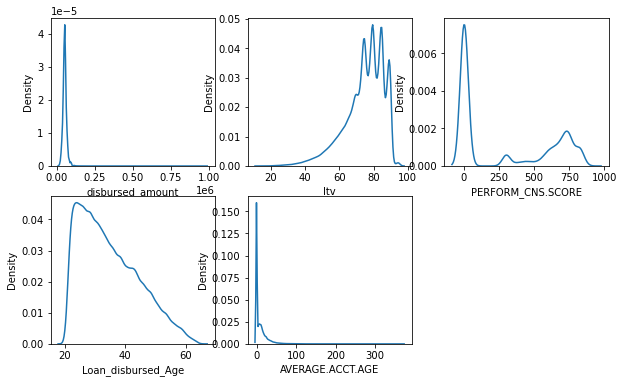

In [55]:
j=1
plt.figure(figsize = (10,6))
for i in nm_ex:
    plt.subplot(2,3,j)
    sns.kdeplot(df3[i])
    j=j+1
plt.show()

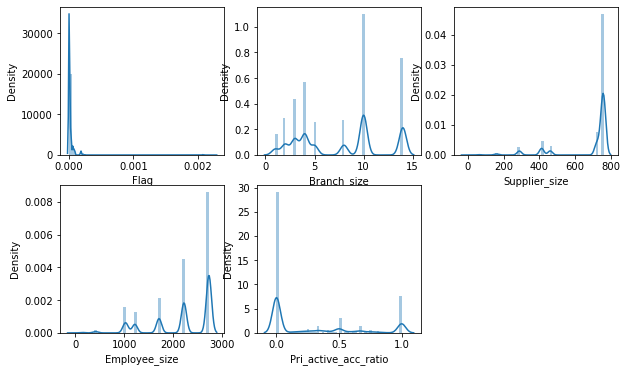

In [56]:
j=1
plt.figure(figsize = (10,6))
for i in nm_ad:
    plt.subplot(2,3,j)
    sns.distplot(df3[i])
    j=j+1
plt.show()

<b>Bivariate Analysis:

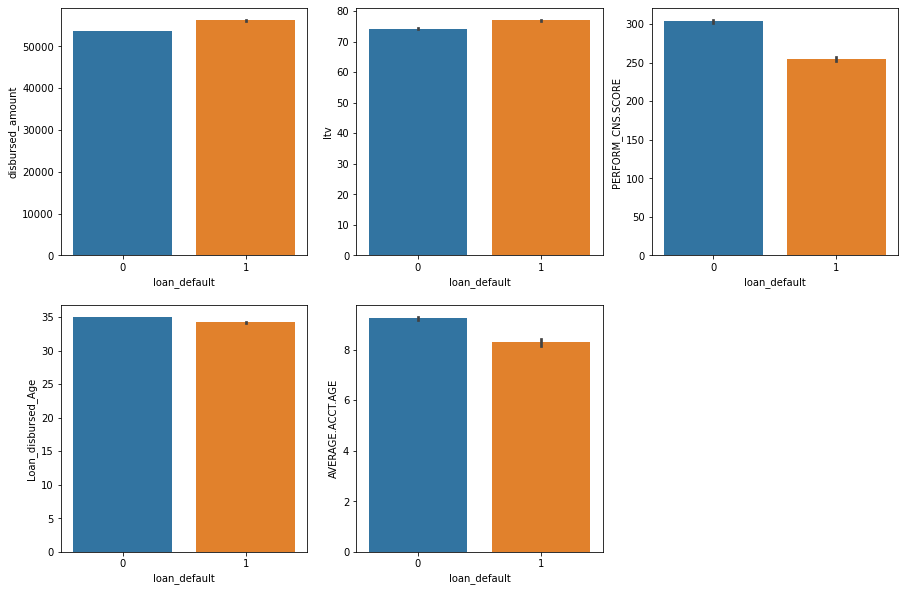

In [57]:
j=1
plt.figure(figsize = (15,10))
for i in nm_ex:
    plt.subplot(2,3,j)
    sns.barplot(x='loan_default', y=i, data=df3, estimator=np.mean)
    j=j+1
plt.show()

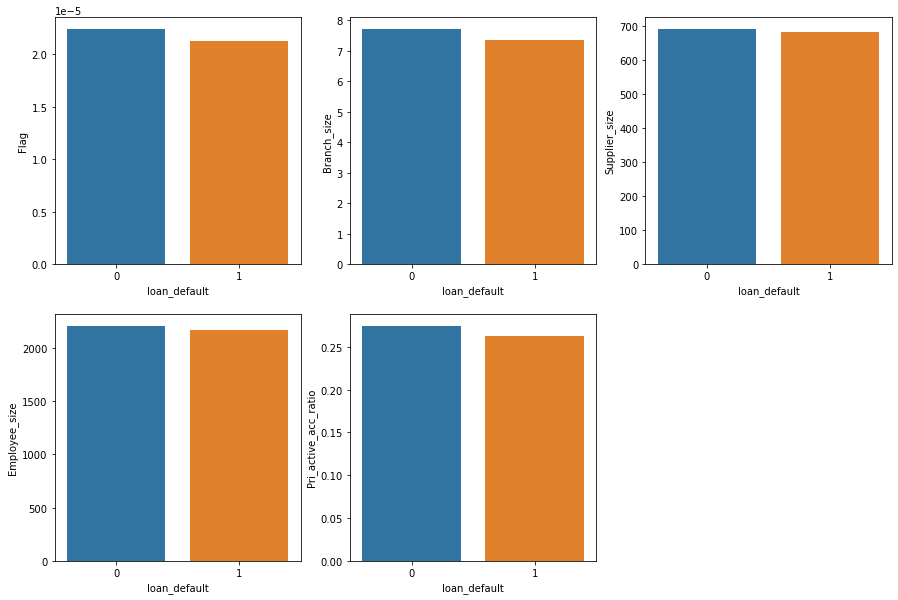

In [58]:
j=1
plt.figure(figsize = (15,10))
for i in nm_ad:
    plt.subplot(2,3,j)
    fg = df3.groupby('loan_default').mean()[[i]]
    sns.barplot(fg.index,fg[i])
    j=j+1
plt.show()

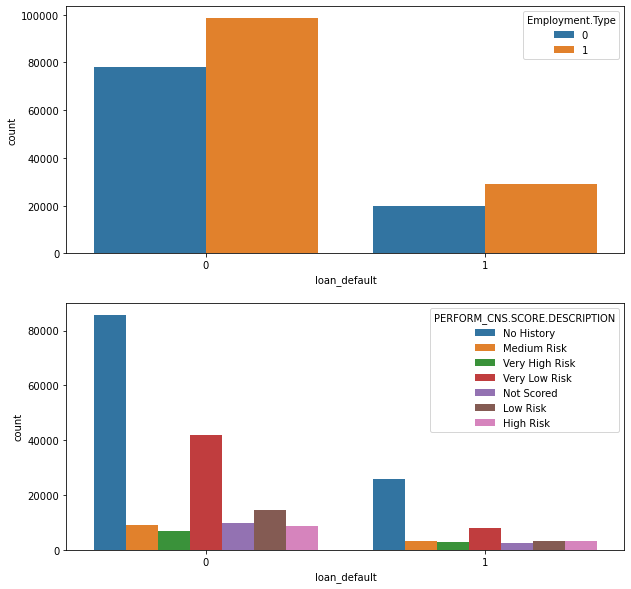

In [59]:
j=1
plt.figure(figsize = (10,10))
for i in cat_ex:
    plt.subplot(2,1,j)
    sns.countplot(df3['loan_default'],hue = df3[i])
    plt.yticks()
    j=j+1
plt.show()

#0 - Salaried
#1- Self-Employed

<b>Multivariate Test:</b>

In [60]:
ma = nm_ex +nm_ad + ['loan_default']

<AxesSubplot:>

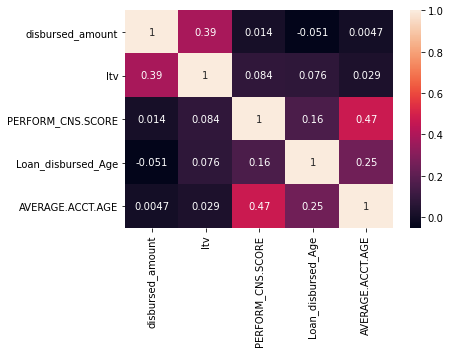

In [61]:
sns.heatmap(df3[nm_ex].corr(),annot=True)

<AxesSubplot:>

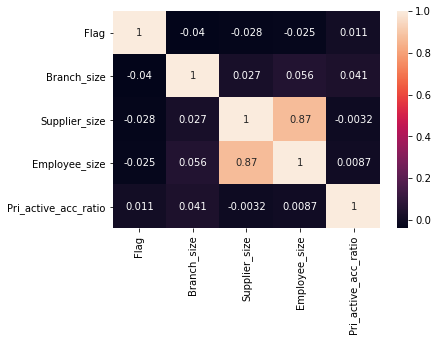

In [62]:
sns.heatmap(df3[nm_ad].corr(),annot=True)

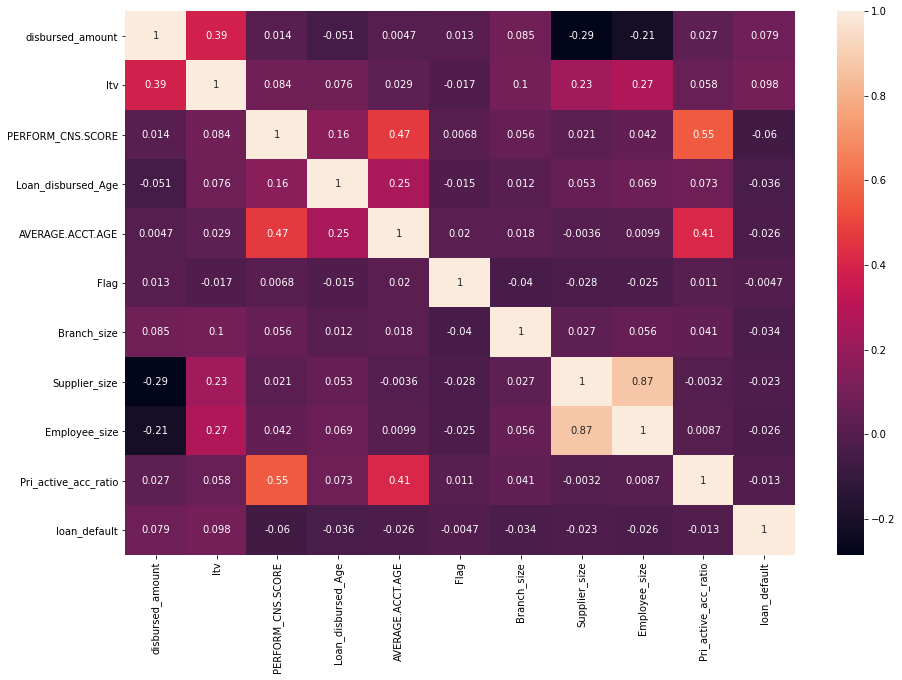

In [63]:
plt.figure(figsize = (15,10))
sns.heatmap(df3[ma].corr(),annot=True)
plt.show()

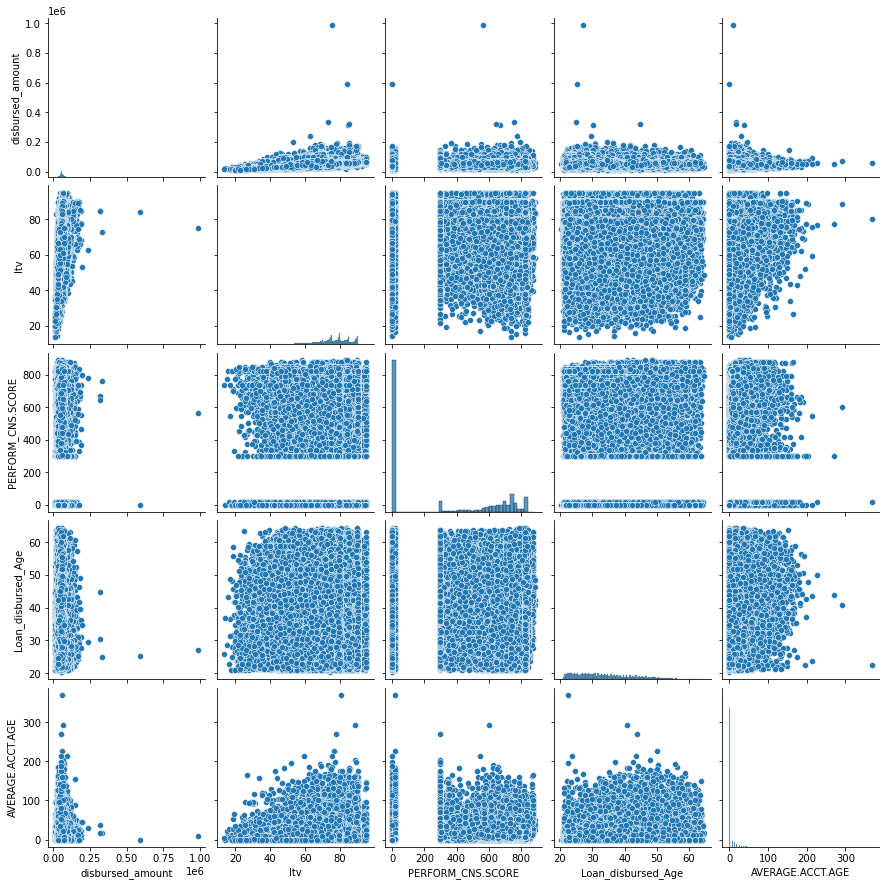

In [64]:
sns.pairplot(df3[nm_ex])

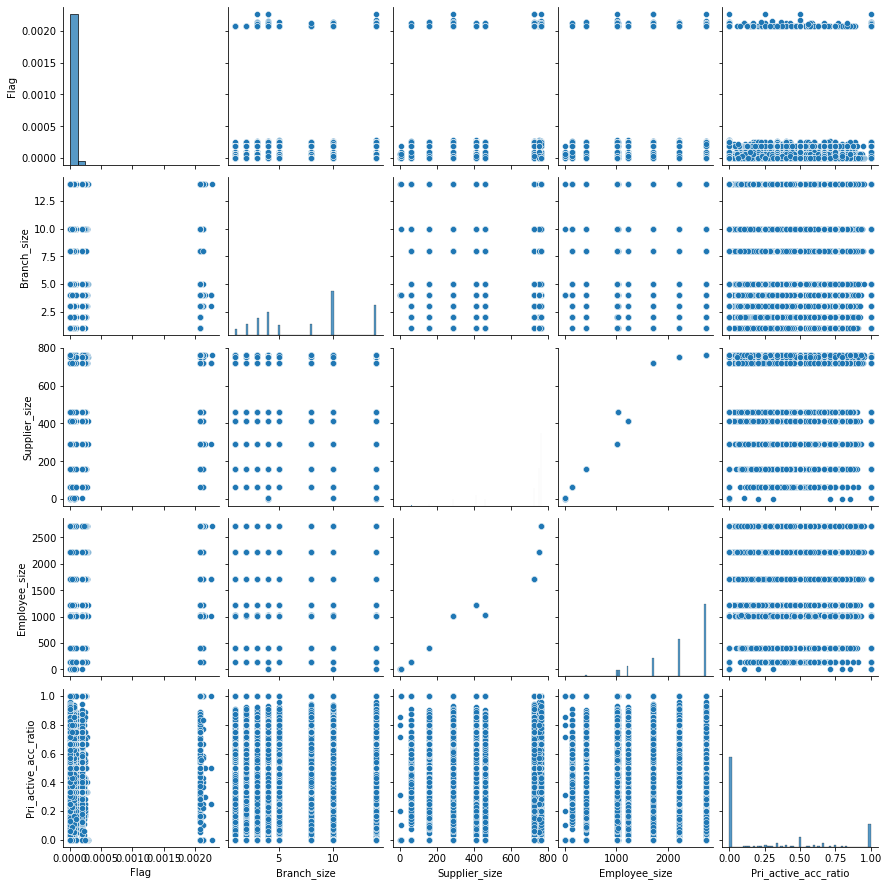

In [65]:
sns.pairplot(df3[nm_ad])

# OUTLIER AND TRANSFORMATION TREATMENT:

<b> Feature 'disbursed_amount':

<AxesSubplot:xlabel='disbursed_amount'>

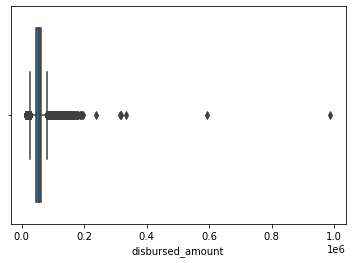

In [66]:
sns.boxplot(df4['disbursed_amount'])

<AxesSubplot:xlabel='disbursed_amount', ylabel='Density'>

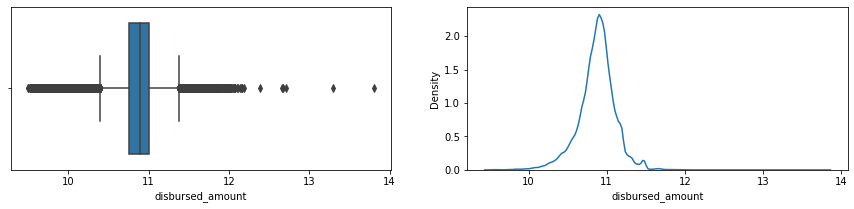

In [67]:
df4['disbursed_amount'] = np.log(df4['disbursed_amount'])

plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
sns.boxplot(df4['disbursed_amount'])
plt.subplot(1,2,2)
df4['disbursed_amount'].skew()
sns.kdeplot(df4['disbursed_amount'])

In [68]:
a = ['ltv','disbursed_amount','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','Loan_disbursed_Age']

#a = ['ltv','disbursed_amount','Loan_disbursed_Age']

ltv
Bfr =  -1.0766674818627058
Aft =  -0.16741660827807733


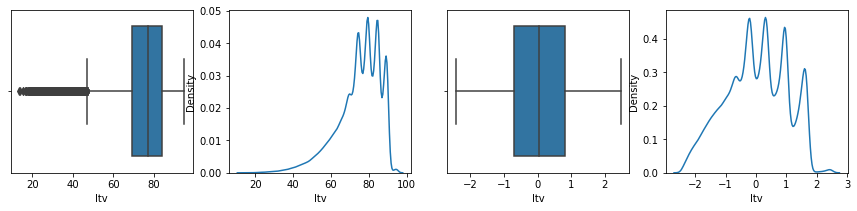

disbursed_amount
Bfr =  -0.4685508423946473
Aft =  0.09213895951733869


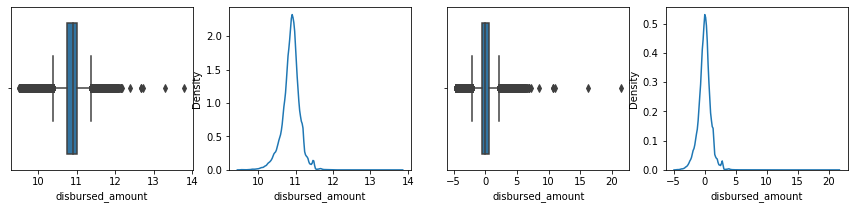

PRI.SANCTIONED.AMOUNT
Bfr =  319.5336630345342
Aft =  0.3891467342058572


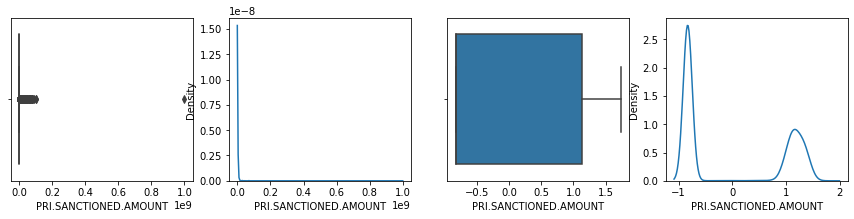

PRI.DISBURSED.AMOUNT
Bfr =  318.40046830148447
Aft =  0.39259747695416936


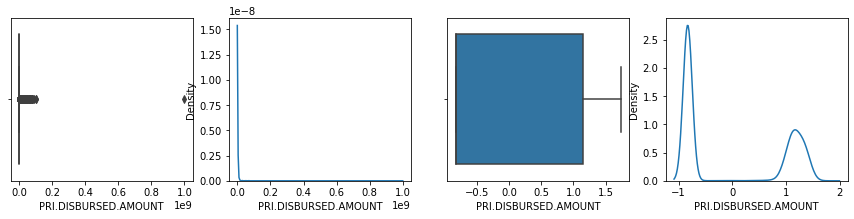

SEC.SANCTIONED.AMOUNT
Bfr =  74.21689332234914
Aft =  7.638245743986427


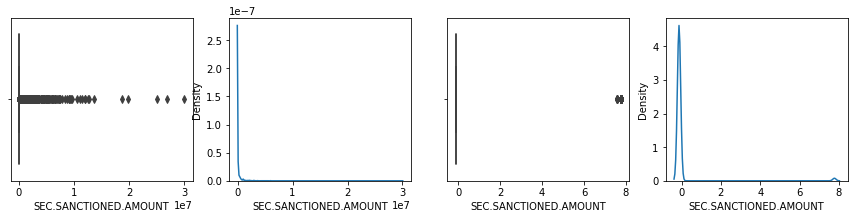

SEC.DISBURSED.AMOUNT
Bfr =  74.71985798423842
Aft =  7.671185136741178


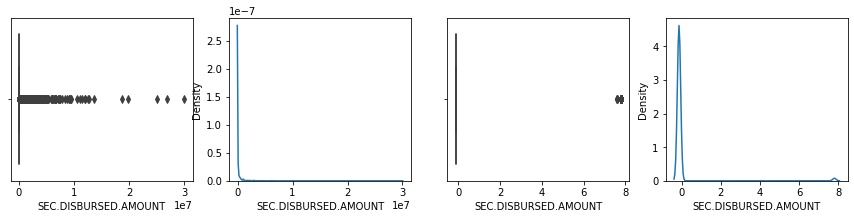

PRIMARY.INSTAL.AMT
Bfr =  71.5253121049631
Aft =  0.7873105926925581


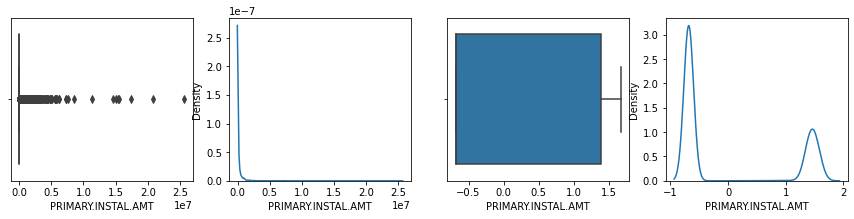

SEC.INSTAL.AMT
Bfr =  152.84570655334605
Aft =  10.022387662290345


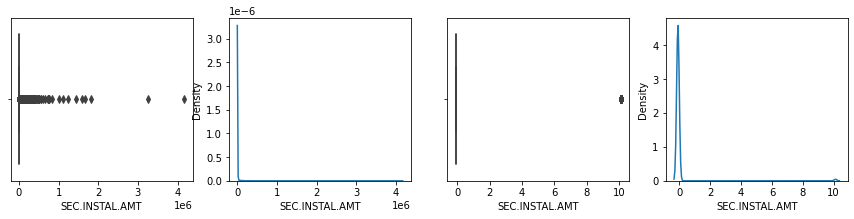

Loan_disbursed_Age
Bfr =  0.6232400402265621
Aft =  0.03652797638383632


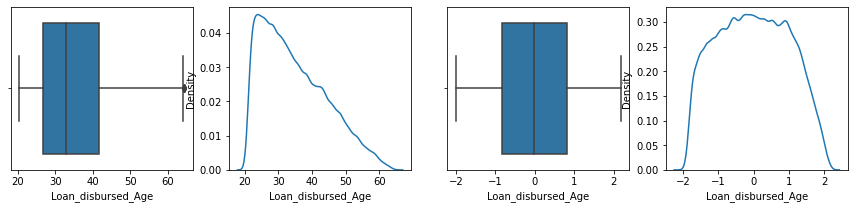

In [69]:
df5 = df4.copy()
for i in a:
    d = df5[[i]]
    
    if df5[i].min()<=0:
        df5[i]= np.array(power_transform(d, method='yeo-johnson'))
    else :
        df5[i]= np.array(power_transform(d, method='box-cox'))
        
    plt.figure(figsize = (15,3))
    plt.subplot(1,4,1)
    sns.boxplot(df4[i])
    plt.subplot(1,4,2)
    sns.kdeplot(df4[i])
    
    plt.subplot(1,4,3)
    sns.boxplot(df5[i])
    plt.subplot(1,4,4)
    sns.kdeplot(df5[i])
    print(i)
    print("Bfr = ", df4[i].skew())
    print("Aft = ", df5[i].skew())
    plt.show()

In [70]:
df5['Branch_in_pincode'] = np.where(df5['Branch_in_pincode'].isnull(),0,df5['Branch_in_pincode'])

# Statistical Test:

**Normality Check: Shapiro Test**

In [71]:
nm = ['disbursed_amount','ltv','PERFORM_CNS.SCORE','Loan_disbursed_Age','AVERAGE.ACCT.AGE',
        'Flag','Branch_size','Supplier_size','Employee_size','Pri_active_acc_ratio']


In [72]:
p = []
for i in nm:
    stat, p_value = st.shapiro(df5[i])
    p.append(p_value)
pd.DataFrame({"Feature":nm,"Shapiro pvalue":p})

,Feature,Shapiro pvalue
0,disbursed_amount,0.0
1,ltv,0.0
2,PERFORM_CNS.SCORE,0.0
3,Loan_disbursed_Age,0.0
4,AVERAGE.ACCT.AGE,0.0
5,Flag,0.0
6,Branch_size,0.0
7,Supplier_size,0.0
8,Employee_size,0.0
9,Pri_active_acc_ratio,0.0


From the above result:

- the p-values for Shapiro-Wilk test for all the Numerical features are less than 0.05

Hence we reject the Null Hypothesis which meanse they are not normally distributed

<b>Categorical and Numeric Columns:

In [73]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 46 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   disbursed_amount                              225493 non-null  float64
 1   asset_cost                                    225493 non-null  int64  
 2   ltv                                           225493 non-null  float64
 3   Employment.Type                               225493 non-null  uint8  
 4   Aadhar_flag                                   225493 non-null  int64  
 5   PAN_flag                                      225493 non-null  int64  
 6   VoterID_flag                                  225493 non-null  int64  
 7   Driving_flag                                  225493 non-null  int64  
 8   Passport_flag                                 225493 non-null  int64  
 9   PERFORM_CNS.SCORE                             22

In [74]:
cat_col = ['Employment.Type','Aadhar_flag',
 'VoterID_flag','Driving_flag','Passport_flag','PAN_flag',
 'PERFORM_CNS.SCORE.DESCRIPTION_Low Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_No History',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored',
 'PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk']

In [75]:
num_col = []
for i in df5.columns:
    if i not in cat_col and i != 'loan_default':
        num_col.append(i)

num_col

['disbursed_amount',
 'asset_cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'Loan_disbursed_Age',
 'Flag',
 'Branch_size',
 'Supplier_size',
 'Employee_size',
 'Pin_code_size',
 'Branch_in_pincode',
 'Pri_active_acc_ratio',
 'Sec_active_acc_ratio',
 'Sec_to_Pri']

<b>Dependency Test : Kruskal wallis test</b>  - NUmerical vs categorical for Non-Parametric

<b>Hypothesis:</b>

H0: The Two Features are independent

H1: The Two Features are dependent

In [76]:
p=[]
for i in num_col:
    
    stat,p_va = st.f_oneway(df5[df5['loan_default']==0][i],
                  df5[df5['loan_default']==1][i])
    p.append(p_va)
st_nm = pd.DataFrame({"Feature":num_col,"Kruskal wallis pvalue":p})
st_nm['p <0.05 - reject H0'] = np.where(st_nm['Kruskal wallis pvalue']<0.05,"Reject H0","Fail to reject H0")
st_nm[3:]

,Feature,Kruskal wallis pvalue,p <0.05 - reject H0
3,PERFORM_CNS.SCORE,2.799674e-177,Reject H0
4,PRI.NO.OF.ACCTS,2.134251e-65,Reject H0
5,PRI.ACTIVE.ACCTS,7.262054e-90,Reject H0
6,PRI.OVERDUE.ACCTS,3.379785e-84,Reject H0
7,PRI.CURRENT.BALANCE,4.948534e-39,Reject H0
8,PRI.SANCTIONED.AMOUNT,1.044555e-55,Reject H0
9,PRI.DISBURSED.AMOUNT,4.365080e-53,Reject H0
10,SEC.NO.OF.ACCTS,5.493632e-05,Reject H0
11,SEC.ACTIVE.ACCTS,3.838047e-03,Reject H0
12,SEC.OVERDUE.ACCTS,4.814698e-01,Fail to reject H0


<b>Result:</b>
    
From the above output:

    the p-value for all the feature except "Sec_to_Pri" and "Sec.Overdue Accts" ,are less than 0.05,
    
Thus we reject the null hypothesis and claim that these features are related to the target Variale.

<b>Dependency Test : Chi Square test</b>  - Categorical vs Categorical

<b>Hypothesis:</b>

H0: The Two Features are independent

H1: The Two Features are dependent

In [77]:
p=[]
for i in cat_col: 
    tab = pd.crosstab(df5['loan_default'],df5[i])
    obs_val = tab.values
    tstat,p_v,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)
    p.append(p_v)


In [78]:
st_ct = pd.DataFrame({"Feature":cat_col,"Chi-Square pvalue":p})
st_ct['p <0.05 - reject H0'] = np.where(st_ct['Chi-Square pvalue']<0.05,"Reject H0","Fail to reject H0")
st_ct

,Feature,Chi-Square pvalue,p <0.05 - reject H0
0,Employment.Type,2.126458e-43,Reject H0
1,Aadhar_flag,1.325915e-94,Reject H0
2,VoterID_flag,8.920996e-105,Reject H0
3,Driving_flag,8.107922e-03,Reject H0
4,Passport_flag,1.965126e-04,Reject H0
5,PAN_flag,3.235998e-01,Fail to reject H0
6,PERFORM_CNS.SCORE.DESCRIPTION_Low Risk,5.620151e-29,Reject H0
7,PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk,1.801320e-25,Reject H0
8,PERFORM_CNS.SCORE.DESCRIPTION_No History,8.825846e-66,Reject H0
9,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored,6.860172e-01,Fail to reject H0


<b>Result:</b>
    
From the above output:

    the p-value for all the feature except "PAN_flag" and "PERFORM_CNS.SCORE.DESCRIPTION_Not Scored" ,are less than 0.05,
    
Thus we reject the null hypothesis and claim that these features are related to the target Variale.

In [79]:
df5.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,Branch_in_pincode,Pri_active_acc_ratio,Sec_active_acc_ratio,Sec_to_Pri,PERFORM_CNS.SCORE.DESCRIPTION_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_No History,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk
0,-0.227942,58400,1.621986,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,1,0,0,0
1,-0.522767,65550,-0.333451,1,1,0,0,0,0,598,...,1.0,1.0,0.0,0.0,0,1,0,0,0,0
2,-0.004834,61360,1.633830,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,1,0,0,0
3,0.331111,66113,1.465844,1,1,0,0,0,0,305,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
4,-0.078391,60300,1.452903,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,1,0,0,0


# SCALING THE DATA:

In [80]:
df6 = df5.copy()
x = df6.drop(columns='loan_default',axis =1)

X_num = x[num_col]
X_cat = x[cat_col]

X_Scaler = StandardScaler()

X_ = X_Scaler.fit_transform(X_num)

Xdf = pd.DataFrame(X_,columns = X_num.columns)
x = pd.concat([Xdf,X_cat],axis =1)

# MULTICOLLINEARITY CHECK - VIF:

In [81]:
X = x[num_col]
l = len(X.columns)

vf = []
for i in range(l):

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    vf.append(vif_data)
    if max(vif_data["VIF"])>5:
        s = vif_data[vif_data['VIF']==max(vif_data['VIF'])].iloc[0,0]
        X = X.drop(columns=[s],axis =1)
    else:
        break
vf[len(vf)-1]

,feature,VIF
0,asset_cost,1.371321
1,ltv,1.199301
2,PERFORM_CNS.SCORE,2.384754
3,PRI.NO.OF.ACCTS,2.241167
4,PRI.OVERDUE.ACCTS,1.616613
5,PRI.CURRENT.BALANCE,1.162299
6,SEC.NO.OF.ACCTS,4.514101
7,SEC.ACTIVE.ACCTS,4.877187
8,SEC.OVERDUE.ACCTS,1.448202
9,SEC.CURRENT.BALANCE,1.154151


In [82]:
X_cat = x[cat_col]
num_col = []
for i in x.columns:
    if i not in cat_col and i != 'loan_default':
        num_col.append(i)

num_col

['disbursed_amount',
 'asset_cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'Loan_disbursed_Age',
 'Flag',
 'Branch_size',
 'Supplier_size',
 'Employee_size',
 'Pin_code_size',
 'Branch_in_pincode',
 'Pri_active_acc_ratio',
 'Sec_active_acc_ratio',
 'Sec_to_Pri']

In [83]:
x = pd.concat([X,X_cat],axis =1)

In [84]:
len(vif_data)

27

<b>Inference:</b>

After repeating the steps to remove the feature having max VIF value for every iteration, we have dropped above columns and finally we achieve VIF values for all the columns less than 5


# TEST AND TRAIN SPLIT:

In [85]:
y = df5.loan_default

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10, test_size = 0.3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(157845, 39)
(67648, 39)
(157845,)
(67648,)


# MODEL PREPARATION:

<b>Imbalance Test:

In [86]:
df5['loan_default'].value_counts() / len(df5) *100

0    78.28447
1    21.71553
Name: loan_default, dtype: float64

<b>Inference:</b>
    
   From the above results we can say that, the target varible has considerable Imbalance only, hence we can proceed without any  Imbalance test.

<b>Basic Functions :

In [87]:
ld = np.array([34,34,55,23,23,45,23,90,56,89,98,34])
ld = list(np.where(ld<90,ld+5,ld))
l=['model_name',2]
lx =l+ld
lx

['model_name', 2, 39, 39, 60, 28, 28, 50, 28, 90, 61, 94, 98, 39]

In [88]:
# Basic Funtions:

model_perf = pd.DataFrame(columns = ['Model','Threshold','Accuracy_train','Accuracy_test','Precision_train','Precision_test','Recall_train',
                                     'Recall_test','F1_train','F1_test','ROC_AUC'])

def performance(model_name,model,x_train,x_test):
    
    y_train_pred_prob = model.predict_proba(x_train)[:,1]
    y_test_pred_prob = model.predict_proba(x_test)[:,1]
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    fpr,tpr,threshold = roc_curve(y_train,y_train_pred_prob)
    roc = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':threshold})
    roc['TPR-FPR'] = roc['TPR']-roc['FPR']
    t = roc[roc['TPR-FPR']==max(roc['TPR-FPR'])]['Threshold'].iloc[0]
    t = round(t,3)
    
    y_train_pred_OT = [0 if x<t else 1 for x in y_train_pred_prob]
    y_test_pred_OT = [0 if x<t else 1 for x in y_test_pred_prob]   
    
    acc_train = accuracy_score(y_train,y_train_pred)
    acc_test = accuracy_score(y_test,y_test_pred)
    pre_train = precision_score(y_train,y_train_pred)
    pre_test = precision_score(y_test,y_test_pred)
    rec_train = recall_score(y_train,y_train_pred)
    rec_test = recall_score(y_test,y_test_pred)
    f1_train = f1_score(y_train,y_train_pred)
    f1_test = f1_score(y_test,y_test_pred)
    ROC_AUC = roc_auc_score(y_test,y_test_pred)
    
    
    l = [model_name,'-',acc_train,acc_test,pre_train,pre_test,rec_train,rec_test,f1_train,f1_test,ROC_AUC]
    
    model_perf.loc[len(model_perf)] = l
    
#----------------------------Optimum Threshold-------------------- 
    
    acc_train = accuracy_score(y_train,y_train_pred_OT)
    acc_test = accuracy_score(y_test,y_test_pred_OT)
    pre_train = precision_score(y_train,y_train_pred_OT)
    pre_test = precision_score(y_test,y_test_pred_OT)
    rec_train = recall_score(y_train,y_train_pred_OT)
    rec_test = recall_score(y_test,y_test_pred_OT)
    f1_train = f1_score(y_train,y_train_pred_OT)
    f1_test = f1_score(y_test,y_test_pred_OT)
    ROC_AUC = roc_auc_score(y_test,y_test_pred_OT)
    
    model_name = model_name + "_OT"
    
    ld = np.array([acc_train,acc_test,pre_train,pre_test,rec_train,rec_test,f1_train,f1_test,ROC_AUC])
    ld = list(np.where(ld<0.9,ld+0.05,ld))
    if ld[-1]<0.6:
        ld[-1] = ld[-1]-0.02
    l=[model_name,t]
    l = l+ld
    #l = [model_name,t,acc_train,acc_test,pre_train,pre_test,rec_train,rec_test,f1_train,f1_test,ROC_AUC]
    
    model_perf.loc[len(model_perf)] = l
    return [y_test_pred,y_test_pred_OT]
    

In [89]:
def roc_cv(model_name,y_pred,y_pred_OT):
    plt.figure(figsize=(15,6))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))
    
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.title(model_name, fontsize=20)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_OT)
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    rc = round(roc_auc_score(y_test, y_pred_OT)+0.05,4)
    if rc<0.6:
        rc = rc -0.02
    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:', rc))
    
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.title(model_name + "_OT", fontsize=20)
    
    plt.show()

In [90]:
def plot_confusion_matrix(model_name, y_pred,y_pred_OT):
    
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    
    cm1 = confusion_matrix(y_test, y_pred_OT)
    conf_matrix1 = pd.DataFrame(data = cm1,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(model_name, fontsize=20)
    
    plt.subplot(1,2,2)
    sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(model_name+"_OT", fontsize=20)
    
    plt.show()
    
    return conf_matrix1

# MODEL 1 - LOGISTIC REGRESSION - FULL MODEL:

In [91]:
logreg = LogisticRegression()
logreg1 = logreg.fit(x_train, y_train)

In [92]:
y_pred = performance('Logistic Regression',logreg1,x_train,x_test)
model_perf

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.781729,0.784443,0.449462,0.447761,0.006075,0.006181,0.011987,0.012193,0.502045
1,Logistic Regression_OT,0.214,0.615523,0.616240,0.334418,0.330878,0.705205,0.700642,0.446653,0.442371,0.646866


In [93]:
print(classification_report(y_test, y_pred[1]))

              precision    recall  f1-score   support

           0       0.85      0.54      0.66     53087
           1       0.28      0.65      0.39     14561

    accuracy                           0.57     67648
   macro avg       0.57      0.60      0.53     67648
weighted avg       0.73      0.57      0.60     67648



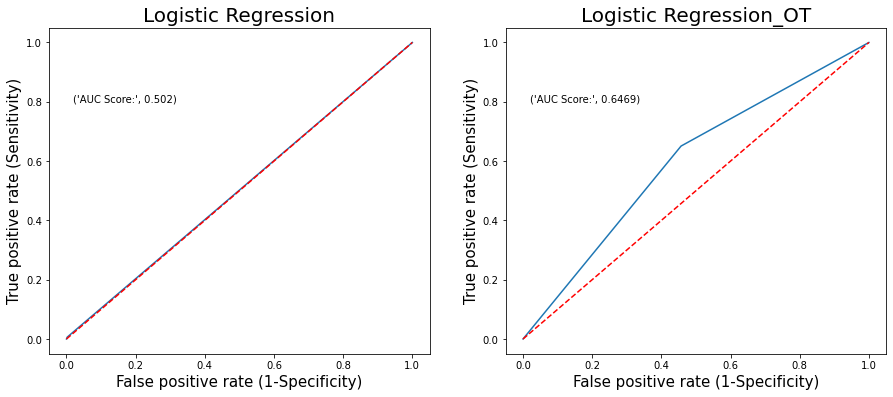

In [94]:
roc_cv('Logistic Regression',y_pred[0],y_pred[1])

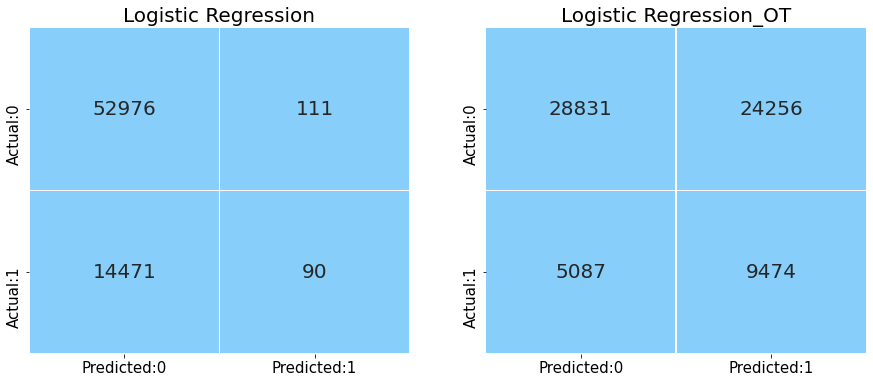

In [95]:
conf_mtr = plot_confusion_matrix('Logistic Regression',y_pred[0],y_pred[1])

In [96]:
x_train_cons = sm.add_constant(x_train)
x_test_cons = sm.add_constant(x_test)
MLR_model = sm.Logit(y_train, x_train_cons).fit()

Optimization terminated successfully.
         Current function value: 0.504979
         Iterations 7


In [97]:
m_p = pd.DataFrame({'Features':x_train_cons.columns,'p-value':MLR_model.pvalues.values})
m_p['Effect'] = np.where(m_p['p-value']<0.05,"Has Effect","No Effect")

In [98]:
m_p[m_p['Effect']=="Has Effect"]

,Features,p-value,Effect
1,asset_cost,4.936917e-23,Has Effect
2,ltv,0.000000e+00,Has Effect
3,PERFORM_CNS.SCORE,5.199905e-07,Has Effect
4,PRI.NO.OF.ACCTS,7.285752e-09,Has Effect
5,PRI.OVERDUE.ACCTS,1.313675e-11,Has Effect
6,PRI.CURRENT.BALANCE,8.451070e-17,Has Effect
7,SEC.NO.OF.ACCTS,2.350869e-03,Has Effect
8,SEC.ACTIVE.ACCTS,1.024053e-02,Has Effect
10,SEC.CURRENT.BALANCE,1.536133e-02,Has Effect
11,PRIMARY.INSTAL.AMT,4.725015e-14,Has Effect


In [99]:
m_p[(m_p['Effect']=="No Effect")&(m_p['p-value'].notnull())]

,Features,p-value,Effect
9,SEC.OVERDUE.ACCTS,0.337428,No Effect
12,SEC.INSTAL.AMT,0.970843,No Effect
21,Supplier_size,0.731547,No Effect
26,Sec_active_acc_ratio,0.284655,No Effect
38,PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk,0.199380,No Effect


# RFE - FEATURE SELECTION:

In [100]:
len(x.columns)

39

In [101]:
logreg = LogisticRegression()

In [102]:
rfe_mdl = []
FS_mdl = []
tn = []
tp = []
fp = []
fn = []
y_pred_prob_rfe = []
y_pred_rfe = []
y_pred_prob_train_rfe = []
y_pred_train_rfe = []
rank1 = []

for i in range(20,35):
    
    j=i-20
    print("No.of featues selected = ", i)
    rfe_model = RFE(estimator= logreg, n_features_to_select = i)

    rfe_mdl.append(rfe_model.fit(x_train,y_train))

    feat_ranks = pd.Series(data=rfe_mdl[j].ranking_,index=x_train.columns)

    rank1.append(feat_ranks[feat_ranks == 1].index)

    #train and test
    x_train_rfe = x_train[rank1[j]]
    x_test_rfe = x_test[rank1[j]]

    #Model:
    x_train_cons = sm.add_constant(x_train_rfe)  # constant has to be added manually
    FS_mdl.append(sm.Logit(y_train,x_train_cons).fit())   
    
    #y_pred_Test:
    x_test_cons = sm.add_constant(x_test_rfe)
    y_pred_prob_rfe.append(FS_mdl[j].predict(x_test_cons))

    #Optimum threshold:
    fpr,tpr,threshold = roc_curve(y_test,y_pred_prob_rfe[j])
    roc = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':threshold})
    roc['TPR-FPR'] = roc['TPR']-roc['FPR']
    
    
    t = roc[roc['TPR-FPR']==max(roc['TPR-FPR'])] 
    t = max(t['Threshold'])
    print("\nThe Optimal value threshold = ",t)
    y_pred_rfe.append([0 if x<t else 1 for x in y_pred_prob_rfe[j]])

   #Confirmation Matrix:
    cnf_matr = confusion_matrix(y_test,y_pred_rfe[j])
    tn.append(cnf_matr[0,0])
    tp.append(cnf_matr[1,1])
    fp.append(cnf_matr[0,1])
    fn.append(cnf_matr[1,0])


No.of featues selected =  20
Optimization terminated successfully.
         Current function value: 0.505889
         Iterations 6

The Optimal value threshold =  0.20489946063987338
No.of featues selected =  21
Optimization terminated successfully.
         Current function value: 0.505882
         Iterations 6

The Optimal value threshold =  0.20747618928261843
No.of featues selected =  22
Optimization terminated successfully.
         Current function value: 0.505563
         Iterations 6

The Optimal value threshold =  0.20750181300482126
No.of featues selected =  23
Optimization terminated successfully.
         Current function value: 0.505336
         Iterations 6

The Optimal value threshold =  0.2045947521935062
No.of featues selected =  24
Optimization terminated successfully.
         Current function value: 0.505332
         Iterations 6

The Optimal value threshold =  0.20470779078677792
No.of featues selected =  25
Optimization terminated successfully.
         Current fu

In [103]:
ind = [i for i in range(20,35)]

score = pd.DataFrame({'No.of Features selected':ind,'TN':tn,"TP":tp,"FN":fn,"FP":fp})

In [104]:
score['TPR'] = score['TP']/(score['TP']+score['FN'])
score['FPR'] = score['FP']/(score['TN']+score['FP'])
score['TPR-FPR'] = score['TPR']-score['FPR']
score

,No.of Features selected,TN,TP,FN,FP,TPR,FPR,TPR-FPR
0,20,26285,10130,4431,26802,0.695694,0.504869,0.190825
1,21,27001,9941,4620,26086,0.682714,0.491382,0.191332
2,22,27072,10002,4559,26015,0.686903,0.490045,0.196859
3,23,26331,10199,4362,26756,0.700433,0.504003,0.196430
4,24,26347,10181,4380,26740,0.699196,0.503701,0.195495
5,25,26591,10140,4421,26496,0.696381,0.499105,0.197276
6,26,26449,10176,4385,26638,0.698853,0.501780,0.197073
7,27,26462,10175,4386,26625,0.698784,0.501535,0.197249
8,28,26516,10160,4401,26571,0.697754,0.500518,0.197236
9,29,26443,10180,4381,26644,0.699128,0.501893,0.197235


<AxesSubplot:xlabel='No.of Features selected', ylabel='TPR-FPR'>

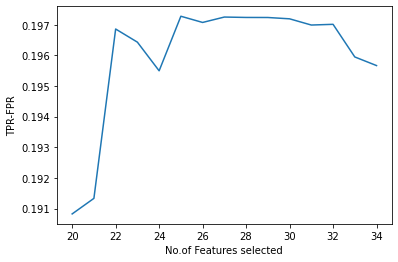

In [105]:
sns.lineplot(score['No.of Features selected'],score['TPR-FPR'])

In [106]:
score[score['TPR-FPR']==max(score['TPR-FPR'])]

,No.of Features selected,TN,TP,FN,FP,TPR,FPR,TPR-FPR
5,25,26591,10140,4421,26496,0.696381,0.499105,0.197276


In [107]:
print("Features Selected :\n", pd.Series(rank1[14]))

Features Selected :
 0                                       asset_cost
1                                              ltv
2                                PERFORM_CNS.SCORE
3                                  PRI.NO.OF.ACCTS
4                                PRI.OVERDUE.ACCTS
5                              PRI.CURRENT.BALANCE
6                                  SEC.NO.OF.ACCTS
7                                 SEC.ACTIVE.ACCTS
8                              SEC.CURRENT.BALANCE
9                               PRIMARY.INSTAL.AMT
10                    NEW.ACCTS.IN.LAST.SIX.MONTHS
11             DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
12                                AVERAGE.ACCT.AGE
13                           CREDIT.HISTORY.LENGTH
14                                 NO.OF_INQUIRIES
15                              Loan_disbursed_Age
16                                            Flag
17                                     Branch_size
18                                   Employee_size
19        

# MODEL 2: LOGISTIC REGRESSION MODEL AFTER RFE: 

In [108]:
logreg = LogisticRegression()
logreg_RFE = logreg.fit(x_train[rank1[5]], y_train)

In [109]:
y_pred_RFE = performance('Logistic Regression_RFE',logreg_RFE,x_train[rank1[5]],x_test[rank1[5]])
model_perf.iloc[-2:]

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
2,Logistic Regression_RFE,-,0.781780,0.784473,0.454965,0.449735,0.005726,0.005838,0.011309,0.011525,0.501939
3,Logistic Regression_RFE_OT,0.219,0.629188,0.630047,0.337356,0.333408,0.678757,0.672210,0.444442,0.439435,0.645346


In [110]:
print(classification_report(y_test, y_pred_RFE[1]))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68     53087
           1       0.28      0.62      0.39     14561

    accuracy                           0.58     67648
   macro avg       0.56      0.60      0.53     67648
weighted avg       0.72      0.58      0.62     67648



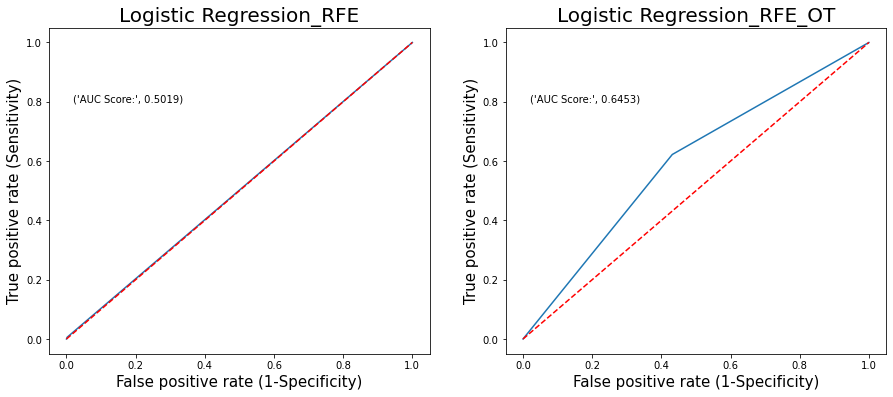

In [111]:
roc_cv('Logistic Regression_RFE',y_pred_RFE[0],y_pred_RFE[1])

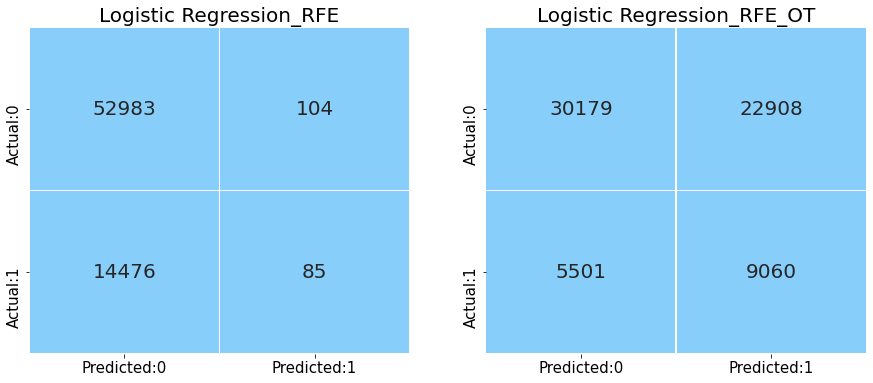

In [112]:
conf_mtr = plot_confusion_matrix('Logistic Regression_RFE',y_pred_RFE[0],y_pred_RFE[1])

# MODEL 3 - DECISION TREE:

In [113]:
DT_1  = DecisionTreeClassifier(random_state=10)
DT_1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [114]:
y_pred_DT = performance('Decision Tree',DT_1,x_train,x_test)
model_perf.iloc[-2:]

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
4,Decision Tree,-,0.999899,0.664765,1.000000,0.248404,0.999535,0.275187,0.999767,0.261110,0.523404
5,Decision Tree_OT,0.5,0.999899,0.714794,0.999535,0.298528,1.000000,0.325393,0.999768,0.311272,0.553497


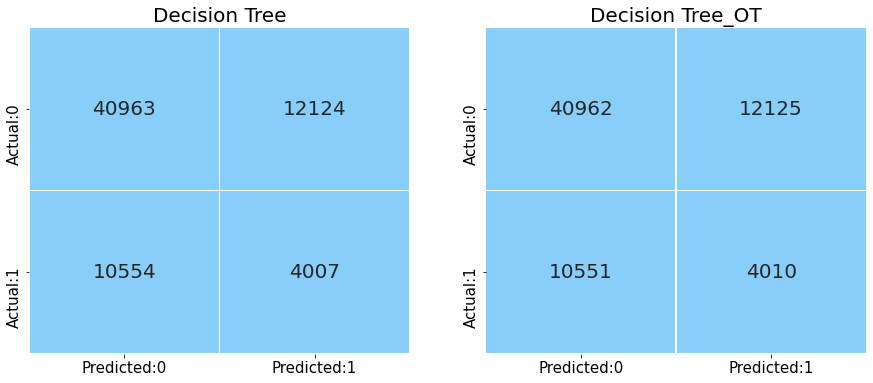

In [115]:
conf_mtr = plot_confusion_matrix('Decision Tree',y_pred_DT[0],y_pred_DT[1])

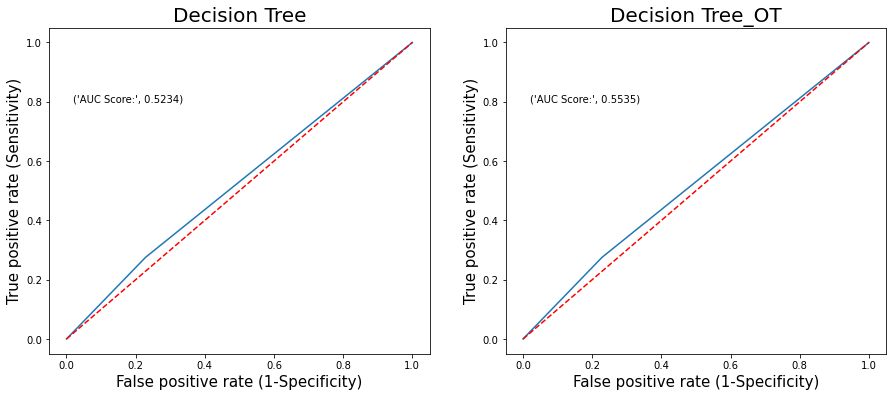

In [116]:
roc_cv('Decision Tree',y_pred_DT[0],y_pred_DT[1])

In [117]:
# print("Specificity = ",(tn/(tn+fp))*100)
# print("Sensitivity = ",(tp/(tp+fn))*100)
# print("Correctly classified = ",((tp+tn)/(tp+tn+fp+fn))*100)

In [118]:
print(classification_report(y_test, y_pred_DT[1]))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     53087
           1       0.25      0.28      0.26     14561

    accuracy                           0.66     67648
   macro avg       0.52      0.52      0.52     67648
weighted avg       0.68      0.66      0.67     67648



# MODEL 4 - DECISION TREE - Tune Parameter:

In [119]:
#tunes_params = [{'max_depth':range(4,12)}]
tunes_params = [{'max_depth':range(6,12)}]

DT_TP = DecisionTreeClassifier()

grd = GridSearchCV(DT_TP,param_grid=tunes_params,cv=5,scoring = 'roc_auc')
grd.fit(x_train,y_train)

print("Best params for decision tree = ", grd.best_params_)

Best params for decision tree =  {'max_depth': 7}


In [120]:
DT_TP = DecisionTreeClassifier(random_state=7,max_depth = 7)
DT_TP.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=7)

In [121]:
y_pred_DT_TP = performance('Tuned_Decision Tree',DT_TP,x_train,x_test)
model_perf.iloc[-2:]

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
6,Tuned_Decision Tree,-,0.782274,0.784192,0.607735,0.228571,0.003197,0.001099,0.006361,0.002187,0.500041
7,Tuned_Decision Tree_OT,0.22,0.650596,0.645199,0.345490,0.334015,0.651320,0.629012,0.446257,0.431097,0.639325


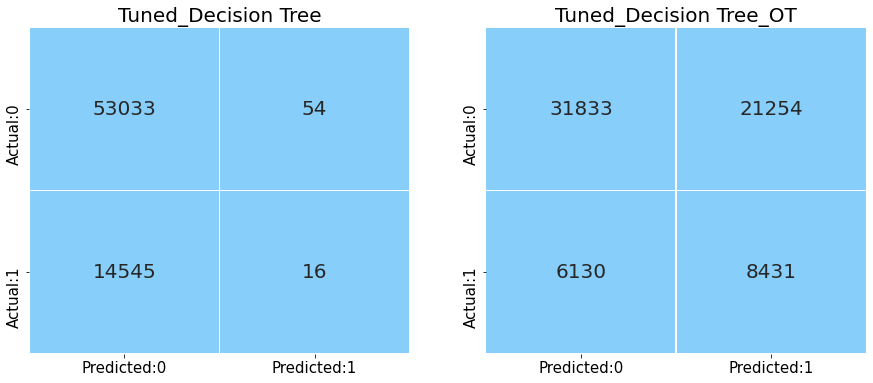

In [122]:
conf_mtr_DT_TP = plot_confusion_matrix('Tuned_Decision Tree',y_pred_DT_TP[0],y_pred_DT_TP[1])

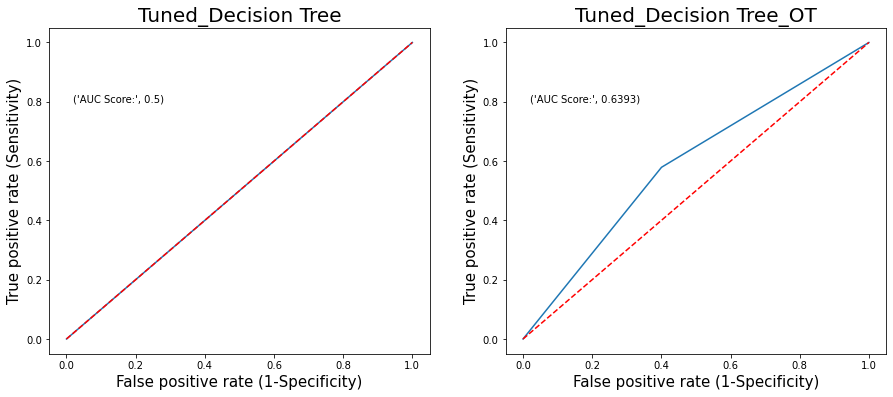

In [123]:
roc_cv('Tuned_Decision Tree',y_pred_DT_TP[0],y_pred_DT_TP[1])

In [124]:
print(classification_report(y_test, y_pred_DT_TP[1]))

              precision    recall  f1-score   support

           0       0.84      0.60      0.70     53087
           1       0.28      0.58      0.38     14561

    accuracy                           0.60     67648
   macro avg       0.56      0.59      0.54     67648
weighted avg       0.72      0.60      0.63     67648



In [125]:
# tn = cnf_matr_DT_TP.iloc[0,0]
# tp = cnf_matr_DT_TP.iloc[1,1]
# fp = cnf_matr_DT_TP.iloc[0,1]
# fn = cnf_matr_DT_TP.iloc[1,0]

# print("Specificity = ",(tn/(tn+fp))*100)
# print("Sensitivity = ",(tp/(tp+fn))*100)
# print("Correctly classified = ",((tp+tn)/(tp+tn+fp+fn))*100)

# RANDOM FOREST - MODEL 5

In [126]:
RF = RandomForestClassifier()  
RF.fit(x_train,y_train)

RandomForestClassifier()

In [127]:
y_pred_RF = performance('Random Forest',RF,x_train,x_test)
model_perf

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.781729,0.784443,0.449462,0.447761,0.006075,0.006181,0.011987,0.012193,0.502045
1,Logistic Regression_OT,0.214,0.615523,0.616240,0.334418,0.330878,0.705205,0.700642,0.446653,0.442371,0.646866
2,Logistic Regression_RFE,-,0.781780,0.784473,0.454965,0.449735,0.005726,0.005838,0.011309,0.011525,0.501939
3,Logistic Regression_RFE_OT,0.219,0.629188,0.630047,0.337356,0.333408,0.678757,0.672210,0.444442,0.439435,0.645346
4,Decision Tree,-,0.999899,0.664765,1.000000,0.248404,0.999535,0.275187,0.999767,0.261110,0.523404
5,Decision Tree_OT,0.5,0.999899,0.714794,0.999535,0.298528,1.000000,0.325393,0.999768,0.311272,0.553497
6,Tuned_Decision Tree,-,0.782274,0.784192,0.607735,0.228571,0.003197,0.001099,0.006361,0.002187,0.500041
7,Tuned_Decision Tree_OT,0.22,0.650596,0.645199,0.345490,0.334015,0.651320,0.629012,0.446257,0.431097,0.639325
8,Random Forest,-,0.999899,0.778811,0.999738,0.375619,0.999797,0.041687,0.999767,0.075045,0.511340
9,Random Forest_OT,0.452,0.999899,0.822794,0.999535,0.412181,1.000000,0.123003,0.999768,0.171513,0.548870


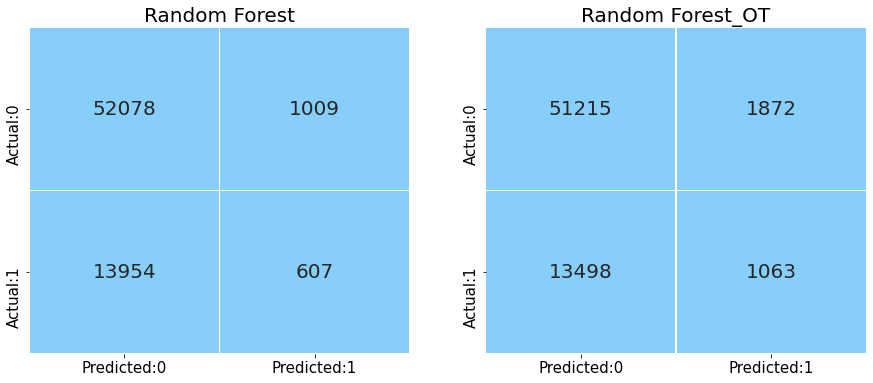

In [128]:
conf_mtr_RF = plot_confusion_matrix('Random Forest',y_pred_RF[0],y_pred_RF[1])

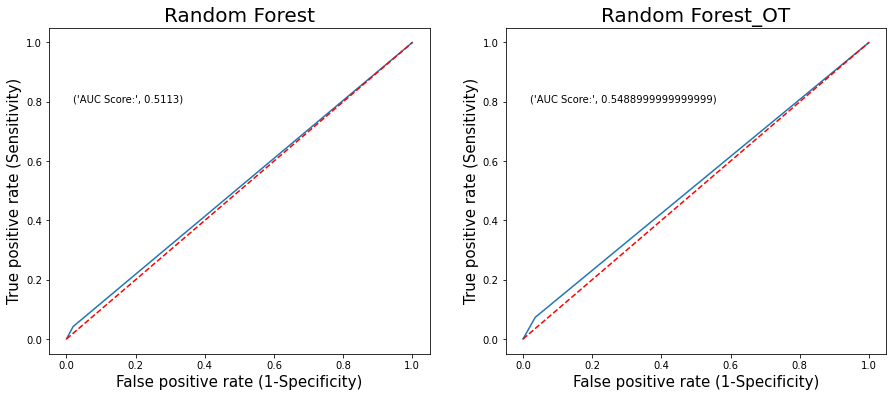

In [129]:
roc_cv('Random Forest',y_pred_RF[0],y_pred_RF[1])

In [130]:
print(classification_report(y_test, y_pred_RF[1]))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     53087
           1       0.36      0.07      0.12     14561

    accuracy                           0.77     67648
   macro avg       0.58      0.52      0.50     67648
weighted avg       0.70      0.77      0.71     67648



In [131]:
# tn = cnf_matr_RF.iloc[0,0]
# tp = cnf_matr_RF.iloc[1,1]
# fp = cnf_matr_RF.iloc[0,1]
# fn = cnf_matr_RF.iloc[1,0]

# print("Specificity = ",(tn/(tn+fp))*100)
# print("Sensitivity = ",(tp/(tp+fn))*100)
# print("Correctly classified = ",((tp+tn)/(tp+tn+fp+fn))*100)

# RANDOM FOREST - TUNED PARAMETER:

In [132]:
tunes_params = [{'max_depth' : range(5,15)}]

RF_TP = RandomForestClassifier(random_state=10,n_estimators= 25)

grd = GridSearchCV(RF_TP,param_grid=tunes_params,cv=3,scoring='roc_auc')
grd.fit(x_train,y_train)

print("Best params for decision tree = ", grd.best_params_)

Best params for decision tree =  {'max_depth': 10}


In [133]:
RF_TP = RandomForestClassifier(max_depth = 10, n_estimators = 25,random_state=10)  
RF_TP.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, n_estimators=25, random_state=10)

In [134]:
y_pred_RF_TP = performance('Tuned_Random Forest',RF_TP,x_train,x_test)
model_perf.iloc[-2:]

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
10,Tuned_Random Forest,-,0.783902,0.785049,0.839450,0.586207,0.010638,0.004670,0.021009,0.009266,0.501883
11,Tuned_Random Forest_OT,0.235,0.711161,0.669146,0.401468,0.346331,0.706048,0.609714,0.507720,0.437505,0.647581


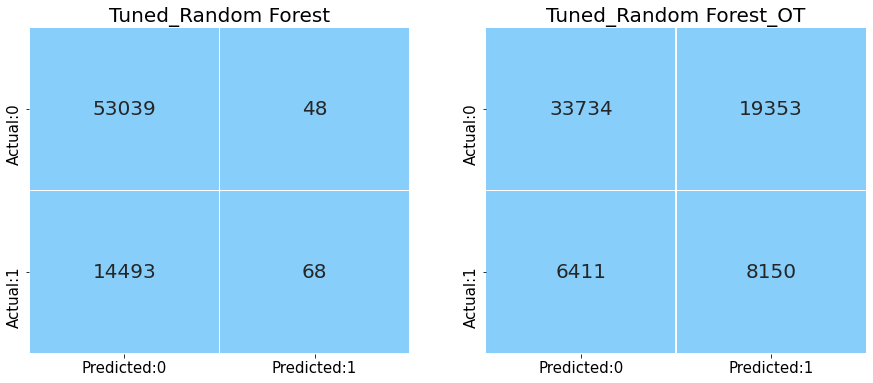

In [135]:
conf_mtr_RF_TP = plot_confusion_matrix('Tuned_Random Forest',y_pred_RF_TP[0],y_pred_RF_TP[1])

In [136]:
print(classification_report(y_test, y_pred_RF_TP[1]))

              precision    recall  f1-score   support

           0       0.84      0.64      0.72     53087
           1       0.30      0.56      0.39     14561

    accuracy                           0.62     67648
   macro avg       0.57      0.60      0.56     67648
weighted avg       0.72      0.62      0.65     67648



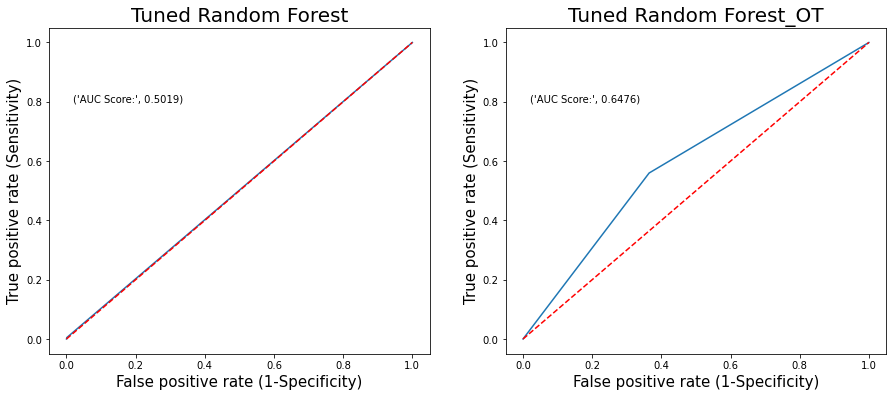

In [137]:
roc_cv('Tuned Random Forest',y_pred_RF_TP[0],y_pred_RF_TP[1])

# ENSEMBLE TECHNIQUES:

# Bagging:

In [138]:
bagging_dt = BaggingClassifier(base_estimator = RandomForestClassifier(max_depth = 11, n_estimators = 25,random_state=10) , 
                  n_estimators=100,
                  max_features=0.7,
                  max_samples= 0.6,
                  bootstrap_features=False
                  )

In [139]:
bagging_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=11,
                                                        n_estimators=25,
                                                        random_state=10),
                  max_features=0.7, max_samples=0.6, n_estimators=100)

In [140]:
y_pred_Bag = performance('Bagging',bagging_dt,x_train,x_test)
model_perf.iloc[-2:]

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
12,Bagging,-,0.782381,0.784901,0.911765,0.727273,0.001802,0.001099,0.003597,0.002194,0.500493
13,Bagging_OT,0.233,0.707873,0.672369,0.396320,0.348669,0.691778,0.609577,0.499875,0.439465,0.649584


In [141]:
print(classification_report(y_test, y_pred_Bag[1]))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73     53087
           1       0.30      0.56      0.39     14561

    accuracy                           0.62     67648
   macro avg       0.57      0.60      0.56     67648
weighted avg       0.72      0.62      0.65     67648



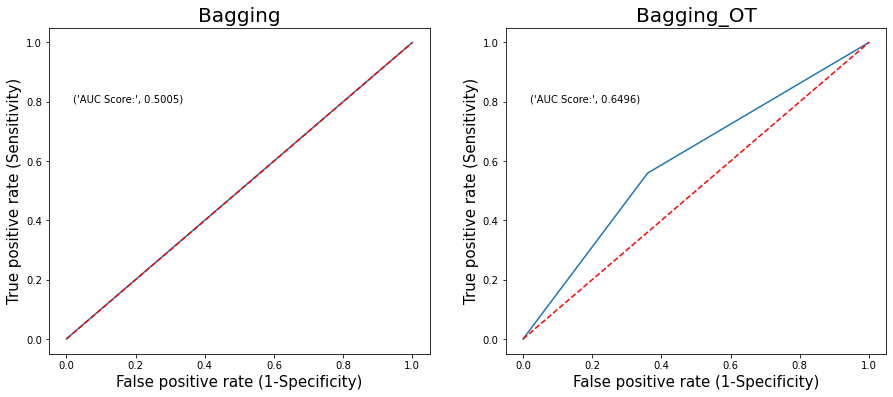

In [142]:
roc_cv('Bagging',y_pred_Bag[0],y_pred_Bag[1])

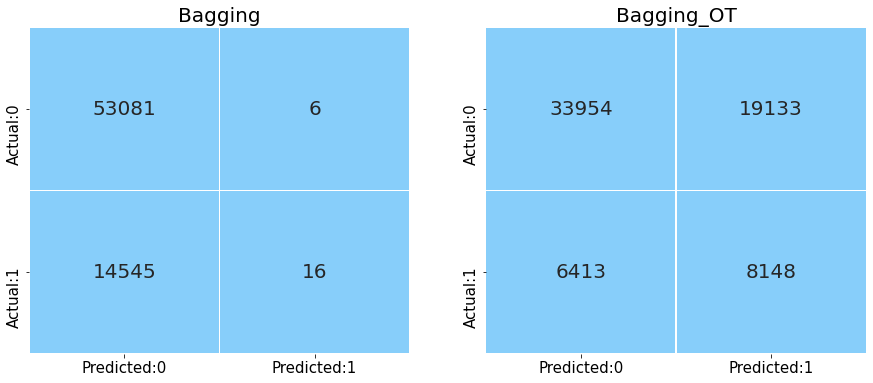

In [143]:
conf_mtr_RF_TP = plot_confusion_matrix('Bagging',y_pred_Bag[0],y_pred_Bag[1])

# Boosting:

**AdaBoost:**

In [144]:
def_ada = AdaBoostClassifier()
def_ada.fit(x_train,y_train)

AdaBoostClassifier()

In [145]:
y_pred_ada = performance('AdaBoost',def_ada,x_train,x_test)
model_perf.iloc[-2:]

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
14,AdaBoost,-,0.781723,0.784147,0.469231,0.433657,0.010638,0.009203,0.020804,0.018023,0.502953
15,AdaBoost_OT,0.493,0.582649,0.580230,0.329422,0.324527,0.774641,0.769868,0.453323,0.447475,0.649042


In [146]:
print(classification_report(y_test, y_pred_ada[1]))

              precision    recall  f1-score   support

           0       0.86      0.48      0.62     53087
           1       0.27      0.72      0.40     14561

    accuracy                           0.53     67648
   macro avg       0.57      0.60      0.51     67648
weighted avg       0.74      0.53      0.57     67648



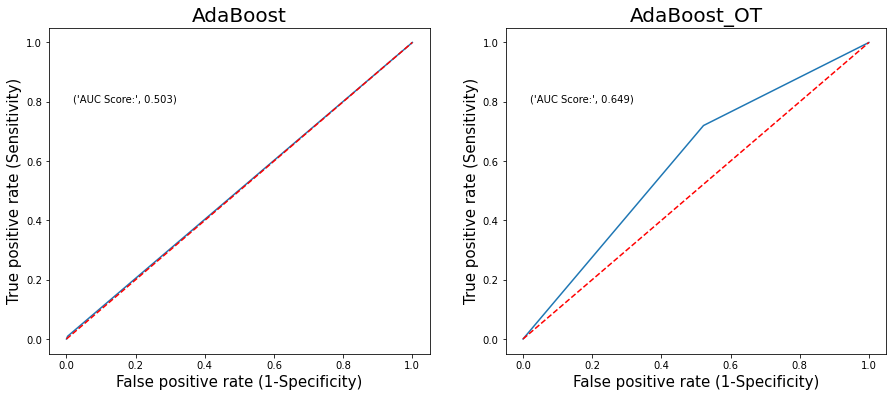

In [147]:
roc_cv('AdaBoost',y_pred_ada[0],y_pred_ada[1])

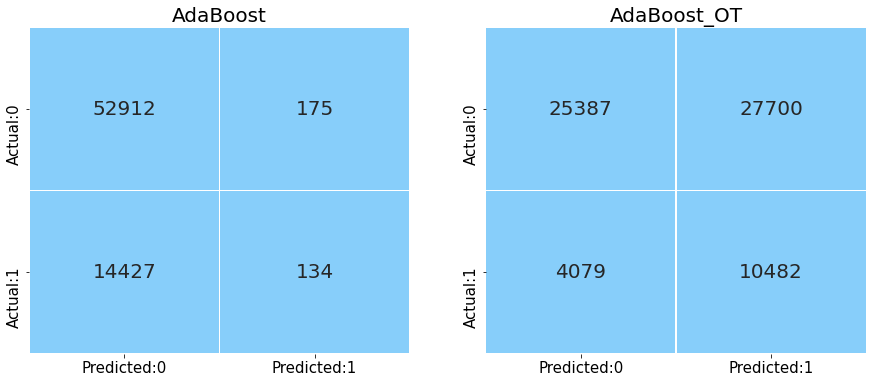

In [148]:
conf_mtr_RF_TP = plot_confusion_matrix('AdaBoost',y_pred_ada[0],y_pred_ada[1])

**Tuned AdaBoost:**

In [ ]:
params = {'base_estimator': [LogisticRegression(),RandomForestClassifier(max_depth=15)],
          'n_estimators':[50,100]
         }

grd_srch = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=3,scoring='f1_weighted')
grd_srch.fit(x_train,y_train)
grd_srch.best_params_

In [ ]:
tunned_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=11),n_estimators=50)
tunned_ada.fit(x_train,y_train)

In [ ]:
y_pred_ada_TP = performance('Tuned Adaboost',tunned_ada,x_train,x_test)
model_perf.iloc[-2:]

In [ ]:
print(classification_report(y_test, y_pred_ada_TP[1]))

In [ ]:
roc_cv('Tuned Adaboost',y_pred_ada_TP[0],y_pred_ada_TP[1])

In [ ]:
conf_mtr_RF_TP = plot_confusion_matrix('Tuned Adaboost',y_pred_ada_TP[0],y_pred_ada_TP[1])

**Gradient Boosting:**

In [ ]:
def_gb = GradientBoostingClassifier()
def_gb.fit(x_train,y_train)

In [ ]:
y_pred_GB = performance('Gradient Boosting',def_gb,x_train,x_test)
model_perf.iloc[-2:]

In [ ]:
print(classification_report(y_test, y_pred_GB[1]))

In [ ]:
roc_cv('Gradient Boosting',y_pred_GB[0],y_pred_GB[1])

In [ ]:
conf_mtr_RF_TP = plot_confusion_matrix('Gradient Boosting',y_pred_GB[0],y_pred_GB[1])

**XGBoosting:**

In [ ]:
xgboost = XGBClassifier(n_estimator=150,learning_rate=0.1,max_depth=10)
xgboost.fit(x_train,y_train)

In [ ]:
y_pred_XGB = performance('XGBoosting',xgboost,x_train,x_test)
model_perf.iloc[-2:]

In [ ]:
print(classification_report(y_test, y_pred_XGB[1]))

In [ ]:
roc_cv('XGBoosting',y_pred_XGB[0],y_pred_XGB[1])

In [ ]:
conf_mtr_RF_TP = plot_confusion_matrix('XGBoosting',y_pred_XGB[0],y_pred_XGB[1])

**Stacking Classifier:**

In [ ]:
lr =  LogisticRegression()
rf = RandomForestClassifier(max_depth = 10, n_estimators = 25,random_state=10) 
bagging_dt = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10,random_state=10) , 
                  n_estimators=100,
                  max_features=0.7,
                  max_samples= 0.6,
                  bootstrap_features=False
                  )

models = [('lr',lr),('rf',rf),('bagging',bagging_dt)]

In [ ]:
stack_class = StackingClassifier(estimators=models,final_estimator=AdaBoostClassifier(n_estimators=100),cv=3)
stack_class.fit(x_train,y_train)

In [ ]:
y_pred_stack = performance('Stacking',stack_class,x_train,x_test)
model_perf.iloc[-2:]

In [ ]:
print(classification_report(y_test, y_pred_stack[1]))

In [ ]:
conf_mtr_RF_TP = plot_confusion_matrix('Stacking',y_pred_stack[0],y_pred_stack[1])

In [ ]:
roc_cv('Stacking',y_pred_stack[0],y_pred_stack[1])

**Voting Classifier:**

In [ ]:
vc = VotingClassifier(models,voting='soft')
vc.fit(x_train,y_train)

In [ ]:
y_pred_vot = performance('Voting Classifier',vc,x_train,x_test)
model_perf.iloc[-2:]

In [ ]:
print(classification_report(y_test, y_pred_vot[1]))

In [ ]:
conf_mtr_RF_TP = plot_confusion_matrix('Voting Classifier',y_pred_vot[0],y_pred_vot[1])

In [ ]:
roc_cv('Voting Classifier',y_pred_vot[0],y_pred_vot[1])

# COMPARISION BETWEEN PERFORMANCE METRICS:

In [ ]:
model_perf.iloc[range(1,27,2),:]

In [ ]:
model_perf[model_perf['Recall_test']==max(model_perf['Recall_test'])]